# Agrupamiento con datos médicos
#### Santiago Mora Cruz A01369517
#### Gabriel Reynoso Escamilla A01643561
#### Guillermo Villegas Morales A01637169

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# clustering methods
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import BisectingKMeans

# Metrics for evaluating clustering results
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [2]:
#df = pd.read_csv('mental_health.csv')
df = pd.read_csv('data_f.csv')
df.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0             120          0.000             0.0                 0.000   
1             132          0.006             0.0                 0.006   
2             133          0.003             0.0                 0.008   
3             134          0.003             0.0                 0.008   
4             132          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                               73                                   0.5   
1                               17                                   2.1   
2                               16                                   2.1   
3                               16                                   2.4   
4                               16                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  \
0                                                 43        
1                                                  0        
2                                                  0        
3                                                  0        
4                                                  0        

   mean_value_of_long_term_variability  histogram_width  histogram_min  \
0                                  2.4               64             62   
1                                 10.4              130             68   
2                                 13.4              130             68   
3                                 23.0              117             53   
4                                 19.9              117             53   

   histogram_max  histogram_number_of_peaks  histogram_mode  histogram_mean  \
0            126                          2             120             137   
1            198                          6             141             136   
2            198                          5             141             135   
3            170                         11             137             134   
4            170                          9             137             136   

   histogram_median  histogram_variance  fetal_health  
0               121                  73             2  
1               140                  12             1  
2               138                  13             1  
3               137                  13             1  
4               138                  11             1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 20 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   int64  
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   int64  
 8   mean_value_of_short_term_variability  

## KMeans Clustering

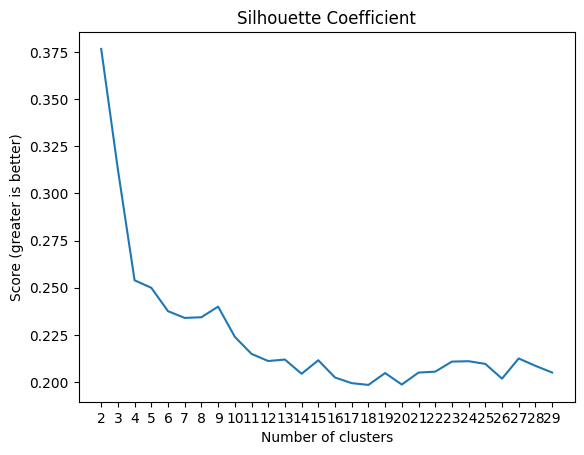

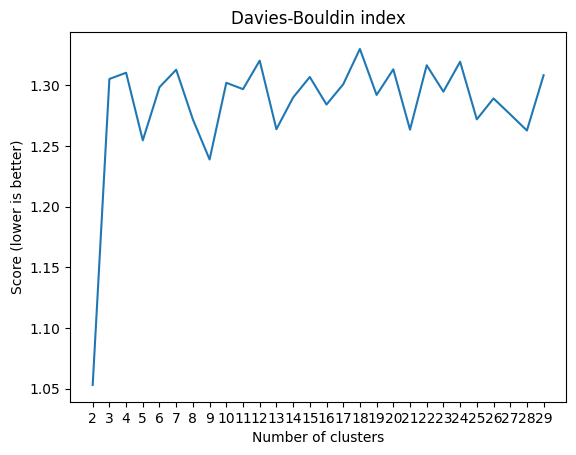

In [4]:
# Agrupamiento
data = df.iloc[:, :-1]
labels = df.iloc[:, -1]
sscore = []
dbscore = []

ks = np.arange(2, 30)
for k in ks:

    kmeans = KMeans(n_clusters=k, n_init=10).fit(data);

    # Silhouette
    sscore.append(silhouette_score(data, kmeans.labels_))

    # Calinski-Harabasz
    dbscore.append(davies_bouldin_score(data, kmeans.labels_))

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(ks, sscore)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Score (greater is better)')
ax.set_title('Silhouette Coefficient')
ax.set_xticks(ks)
plt.show();

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(ks, dbscore)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Score (lower is better)')
ax.set_title('Davies-Bouldin index')
ax.set_xticks(ks)

plt.show();

In [5]:
kmeans = KMeans(n_clusters=2, n_init=10).fit(data)
clustering_labels = kmeans.labels_

list0km = []
list1km = []


for i in range(len(clustering_labels)):
    if clustering_labels[i] == 0:
        list0km.append(labels[i])
    elif clustering_labels[i] == 1:
        list1km.append(labels[i])

print('Grupo 0:', list0km)
print('Grupo 1:',list1km)


Grupo 0: [1, 3, 3, 3, 3, 3, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 

In [6]:
print('Grupo 0:')
for label in set(list0km):
    count = list0km.count(label)
    print(f"\t{label}: {count}")

print('Grupo 1:')
for label in set(list1km):
    count = list1km.count(label)
    print(f"\t{label}: {count}")


Grupo 0:
	1: 829
	2: 229
	3: 65
Grupo 1:
	1: 826
	2: 66
	3: 111


In [7]:
dfkm = df
dfkm['cluster'] = clustering_labels
dfkm[dfkm['cluster']==0].describe()

baseline value  accelerations  fetal_movement  uterine_contractions  \
count     1123.000000    1123.000000     1123.000000           1123.000000   
mean       135.162066       0.002507        0.003682              0.004116   
std         10.361406       0.003549        0.020551              0.002805   
min        106.000000       0.000000        0.000000              0.000000   
25%        127.000000       0.000000        0.000000              0.002000   
50%        136.000000       0.000000        0.000000              0.004000   
75%        143.000000       0.004000        0.001000              0.006000   
max        160.000000       0.018000        0.375000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          1123.000000                1123.0               1123.000000   
mean              0.000364                   0.0                  0.000020   
std               0.000996                   0.0                  0.000254   
min               0.000000                   0.0                  0.000000   
25%               0.000000                   0.0                  0.000000   
50%               0.000000                   0.0                  0.000000   
75%               0.000000                   0.0                  0.000000   
max               0.009000                   0.0                  0.005000   

       abnormal_short_term_variability  mean_value_of_short_term_variability  \
count                      1123.000000                           1123.000000   
mean                         50.091719                              0.885129   
std                          17.416609                              0.549689   
min                          15.000000                              0.200000   
25%                          36.000000                              0.500000   
50%                          51.000000                              0.800000   
75%                          64.000000                              1.200000   
max                          87.000000                              4.200000   

       percentage_of_time_with_abnormal_long_term_variability  ...  \
count                                        1123.000000       ...   
mean                                           15.978629       ...   
std                                            22.339455       ...   
min                                             0.000000       ...   
25%                                             0.000000       ...   
50%                                             4.000000       ...   
75%                                            27.000000       ...   
max                                            91.000000       ...   

       histogram_width  histogram_min  histogram_max  \
count      1123.000000    1123.000000    1123.000000   
mean         39.005343     117.770258     156.775601   
std          17.568911      16.561524      13.911660   
min           3.000000      67.000000     122.000000   
25%          25.000000     105.000000     147.000000   
50%          38.000000     119.000000     156.000000   
75%          52.000000     130.000000     166.000000   
max          83.000000     159.000000     205.000000   

       histogram_number_of_peaks  histogram_mode  histogram_mean  \
count                1123.000000     1123.000000     1123.000000   
mean                    2.314337      140.703473      139.541407   
std                     1.752523       12.970770       12.401154   
min                     0.000000      107.000000      109.000000   
25%                     1.000000      131.000000      130.000000   
50%                     2.000000      142.000000      140.000000   
75%                     3.000000      150.000000      148.000000   
max                    12.000000      186.000000      182.000000   

       histogram_median  histogram_variance  fetal_health  cluster  
count       1123.000000         1123.000000   1123.000000   11

In [8]:
dfkm[dfkm['cluster']==1].describe()

baseline value  accelerations  fetal_movement  uterine_contractions  \
count     1003.000000    1003.000000     1003.000000           1003.000000   
mean       131.223330       0.003930        0.015973              0.004647   
std          8.772688       0.004064        0.063762              0.003074   
min        110.000000       0.000000        0.000000              0.000000   
25%        125.000000       0.000000        0.000000              0.002000   
50%        131.000000       0.003000        0.000000              0.005000   
75%        137.000000       0.007000        0.004000              0.007000   
max        159.000000       0.019000        0.481000              0.014000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          1003.000000           1003.000000               1003.000000   
mean              0.003597              0.000007                  0.000313   
std               0.003456              0.000083                  0.000788   
min               0.000000              0.000000                  0.000000   
25%               0.000000              0.000000                  0.000000   
50%               0.003000              0.000000                  0.000000   
75%               0.006000              0.000000                  0.000000   
max               0.015000              0.001000                  0.005000   

       abnormal_short_term_variability  mean_value_of_short_term_variability  \
count                      1003.000000                           1003.000000   
mean                         43.517448                              1.833998   
std                          16.259204                              0.916532   
min                          12.000000                              0.300000   
25%                          28.500000                              1.200000   
50%                          44.000000                              1.600000   
75%                          59.000000                              2.200000   
max                          86.000000                              7.000000   

       percentage_of_time_with_abnormal_long_term_variability  ...  \
count                                        1003.000000       ...   
mean                                            2.981057       ...   
std                                             8.343705       ...   
min                                             0.000000       ...   
25%                                             0.000000       ...   
50%                                             0.000000       ...   
75%                                             0.000000       ...   
max                                            71.000000       ...   

       histogram_width  histogram_min  histogram_max  \
count      1003.000000    1003.000000    1003.000000   
mean        105.648056      66.494516     172.142572   
std          22.899955      12.482432      18.474253   
min          57.000000      50.000000     126.000000   
25%          89.000000      56.000000     158.000000   
50%         102.000000      65.000000     171.000000   
75%         123.000000      74.000000     184.000000   
max         180.000000     114.000000     238.000000   

       histogram_number_of_peaks  histogram_mode  histogram_mean  \
count                1003.000000     1003.000000     1003.000000   
mean                    6.031904      133.811565      129.089731   
std                     2.775171       18.857205       16.903209   
min                     0.000000       60.000000       73.000000   
25%                     4.000000      126.000000      120.000000   
50%                     6.000000      136.000000      131.000000   
75%                     8.000000      145.000000      141.000000   
max                    18.000000      187.000000      173.000000   

       histogram_median  histogram_variance  fetal_health  cluster  
count       1003.000000         1003.000000   1003.000000   10

## Bisecting KMeans

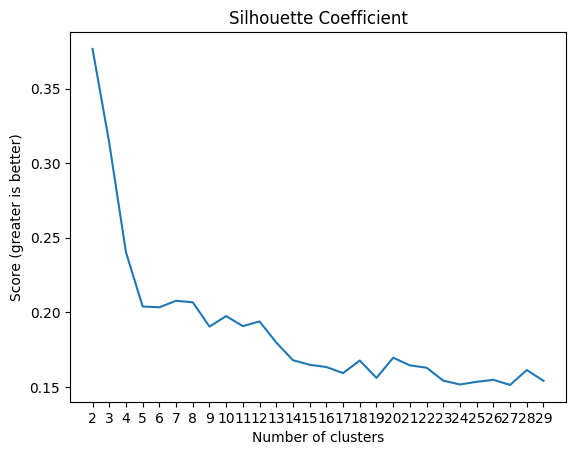

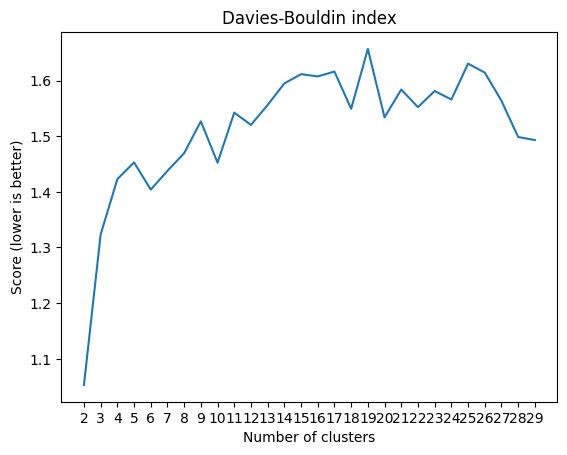

In [9]:
sscore = []
dbscore = []

ks = np.arange(2, 30)
for k in ks:

    agg = BisectingKMeans(n_clusters=k).fit(data);

    # Silhouette
    sscore.append(silhouette_score(data, agg.labels_))

    # Calinski-Harabasz
    dbscore.append(davies_bouldin_score(data, agg.labels_))


fig = plt.figure()
ax = fig.add_subplot()
ax.plot(ks, sscore)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Score (greater is better)')
ax.set_title('Silhouette Coefficient')
ax.set_xticks(ks)
plt.show();

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(ks, dbscore)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Score (lower is better)')
ax.set_title('Davies-Bouldin index')
ax.set_xticks(ks)

plt.show();

El número óptimo de clusters es 2

In [10]:
bkm = BisectingKMeans(n_clusters=2).fit(data)
cluster_labels = bkm.labels_

list0spct = []
list1spct = []



for i in range(len(cluster_labels)):
    if cluster_labels[i] == 0:
        list0spct.append(labels[i])
    elif cluster_labels[i] == 1:
        list1spct.append(labels[i])


print('Grupo 0:', list0spct)
print('Grupo 1:', list1spct)


Grupo 0: [2, 1, 1, 1, 1, 3, 3, 3, 3, 3, 2, 2, 1, 1, 1, 1, 2, 1, 1, 3, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [11]:
print('Grupo 0:')
for label in set(list0spct):
    count = list0spct.count(label)
    print(f"\t{label}: {count}")

print('Grupo 1:')
for label in set(list1spct):
    count = list1spct.count(label)
    print(f"\t{label}: {count}")



Grupo 0:
	1: 826
	2: 66
	3: 111
Grupo 1:
	1: 829
	2: 229
	3: 65


In [12]:
# Estadísticas descriptivas
dfs = df
dfs['clusters'] = cluster_labels
dfs[dfs['clusters']==0].describe()

baseline value  accelerations  fetal_movement  uterine_contractions  \
count     1003.000000    1003.000000     1003.000000           1003.000000   
mean       131.223330       0.003930        0.015973              0.004647   
std          8.772688       0.004064        0.063762              0.003074   
min        110.000000       0.000000        0.000000              0.000000   
25%        125.000000       0.000000        0.000000              0.002000   
50%        131.000000       0.003000        0.000000              0.005000   
75%        137.000000       0.007000        0.004000              0.007000   
max        159.000000       0.019000        0.481000              0.014000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          1003.000000           1003.000000               1003.000000   
mean              0.003597              0.000007                  0.000313   
std               0.003456              0.000083                  0.000788   
min               0.000000              0.000000                  0.000000   
25%               0.000000              0.000000                  0.000000   
50%               0.003000              0.000000                  0.000000   
75%               0.006000              0.000000                  0.000000   
max               0.015000              0.001000                  0.005000   

       abnormal_short_term_variability  mean_value_of_short_term_variability  \
count                      1003.000000                           1003.000000   
mean                         43.517448                              1.833998   
std                          16.259204                              0.916532   
min                          12.000000                              0.300000   
25%                          28.500000                              1.200000   
50%                          44.000000                              1.600000   
75%                          59.000000                              2.200000   
max                          86.000000                              7.000000   

       percentage_of_time_with_abnormal_long_term_variability  ...  \
count                                        1003.000000       ...   
mean                                            2.981057       ...   
std                                             8.343705       ...   
min                                             0.000000       ...   
25%                                             0.000000       ...   
50%                                             0.000000       ...   
75%                                             0.000000       ...   
max                                            71.000000       ...   

       histogram_min  histogram_max  histogram_number_of_peaks  \
count    1003.000000    1003.000000                1003.000000   
mean       66.494516     172.142572                   6.031904   
std        12.482432      18.474253                   2.775171   
min        50.000000     126.000000                   0.000000   
25%        56.000000     158.000000                   4.000000   
50%        65.000000     171.000000                   6.000000   
75%        74.000000     184.000000                   8.000000   
max       114.000000     238.000000                  18.000000   

       histogram_mode  histogram_mean  histogram_median  histogram_variance  \
count     1003.000000     1003.000000       1003.000000         1003.000000   
mean       133.811565      129.089731        134.336989           35.107677   
std         18.857205       16.903209         15.571293           35.269739   
min         60.000000       73.000000         77.000000            0.000000   
25%        126.000000      120.000000        125.000000           12.000000   
50%        136.000000      131.000000        136.000000           25.000000   
75%        145.000000      141.000000        145.000000           45.000000   
max        187.000000 

In [13]:
dfs[dfs['clusters']==1].describe()

baseline value  accelerations  fetal_movement  uterine_contractions  \
count     1123.000000    1123.000000     1123.000000           1123.000000   
mean       135.162066       0.002507        0.003682              0.004116   
std         10.361406       0.003549        0.020551              0.002805   
min        106.000000       0.000000        0.000000              0.000000   
25%        127.000000       0.000000        0.000000              0.002000   
50%        136.000000       0.000000        0.000000              0.004000   
75%        143.000000       0.004000        0.001000              0.006000   
max        160.000000       0.018000        0.375000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          1123.000000                1123.0               1123.000000   
mean              0.000364                   0.0                  0.000020   
std               0.000996                   0.0                  0.000254   
min               0.000000                   0.0                  0.000000   
25%               0.000000                   0.0                  0.000000   
50%               0.000000                   0.0                  0.000000   
75%               0.000000                   0.0                  0.000000   
max               0.009000                   0.0                  0.005000   

       abnormal_short_term_variability  mean_value_of_short_term_variability  \
count                      1123.000000                           1123.000000   
mean                         50.091719                              0.885129   
std                          17.416609                              0.549689   
min                          15.000000                              0.200000   
25%                          36.000000                              0.500000   
50%                          51.000000                              0.800000   
75%                          64.000000                              1.200000   
max                          87.000000                              4.200000   

       percentage_of_time_with_abnormal_long_term_variability  ...  \
count                                        1123.000000       ...   
mean                                           15.978629       ...   
std                                            22.339455       ...   
min                                             0.000000       ...   
25%                                             0.000000       ...   
50%                                             4.000000       ...   
75%                                            27.000000       ...   
max                                            91.000000       ...   

       histogram_min  histogram_max  histogram_number_of_peaks  \
count    1123.000000    1123.000000                1123.000000   
mean      117.770258     156.775601                   2.314337   
std        16.561524      13.911660                   1.752523   
min        67.000000     122.000000                   0.000000   
25%       105.000000     147.000000                   1.000000   
50%       119.000000     156.000000                   2.000000   
75%       130.000000     166.000000                   3.000000   
max       159.000000     205.000000                  12.000000   

       histogram_mode  histogram_mean  histogram_median  histogram_variance  \
count     1123.000000     1123.000000       1123.000000         1123.000000   
mean       140.703473      139.541407        141.442565            4.250223   
std         12.970770       12.401154         12.489748            5.460496   
min        107.000000      109.000000        111.000000            0.000000   
25%        131.000000      130.000000        132.000000            1.000000   
50%        142.000000      140.000000        142.000000            3.000000   
75%        150.000000      148.000000        150.000000            6.000000   
max        186.000000 

## Gaussian Mixture Models Clustering

Clustering

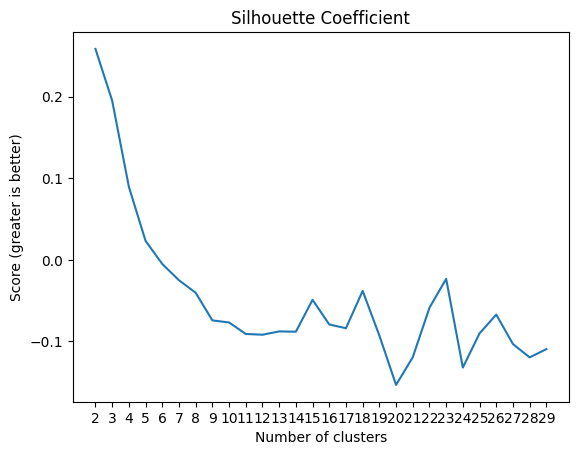

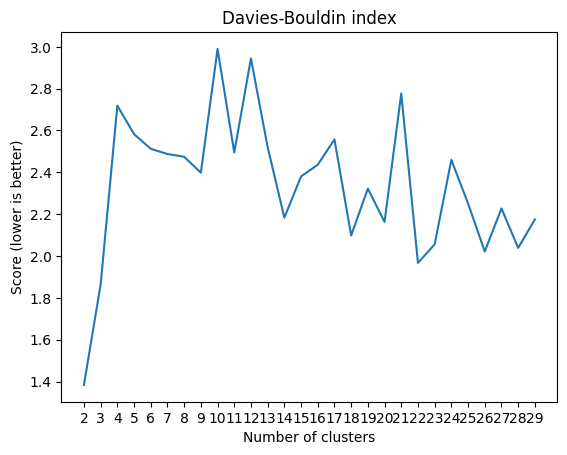

In [14]:
sscore = []
dbscore = []

cs = np.arange(2, 30)
for k in ks:

    gmm = GaussianMixture(n_components=k, random_state=0).fit(data);
    gmm_labels = gmm.predict(data)
    # Silhouette
    sscore.append(silhouette_score(data, gmm_labels))

    # Calinski-Harabasz
    dbscore.append(davies_bouldin_score(data, gmm_labels))

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(cs, sscore)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Score (greater is better)')
ax.set_title('Silhouette Coefficient')
ax.set_xticks(cs)
plt.show();

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(cs, dbscore)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Score (lower is better)')
ax.set_title('Davies-Bouldin index')
ax.set_xticks(cs)

plt.show();

El número óptimo de clusters es 2

Modelo definitivo

In [15]:
gmm = GaussianMixture(n_components=2, random_state=0).fit(data);
gmm_clustering_labels = gmm.predict(data)

list0gmm = []
list1gmm = []


for i in range(len(clustering_labels)):
    if clustering_labels[i] == 0:
        list0gmm.append(labels[i])
    elif clustering_labels[i] == 1:
        list1gmm.append(labels[i])

print('Grupo 0:', list0gmm)
print('Grupo 1:',list1gmm)

Grupo 0: [1, 3, 3, 3, 3, 3, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 

In [16]:
print('Grupo 0:')
for label in set(list0gmm):
    count = list0gmm.count(label)
    print(f"\t{label}: {count}")

print('Grupo 1:')
for label in set(list1gmm):
    count = list1gmm.count(label)
    print(f"\t{label}: {count}")

Grupo 0:
	1: 829
	2: 229
	3: 65
Grupo 1:
	1: 826
	2: 66
	3: 111


In [17]:
dfgm = df
dfgm['cluster']=gmm_clustering_labels
dfgm[dfgm['cluster']==0].describe()

baseline value  accelerations  fetal_movement  uterine_contractions  \
count      813.000000     813.000000      813.000000            813.000000   
mean       130.768758       0.003985        0.021603              0.005278   
std          8.132411       0.004131        0.073669              0.002900   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.003000   
50%        131.000000       0.003000        0.001000              0.005000   
75%        136.000000       0.007000        0.005000              0.007000   
max        158.000000       0.019000        0.481000              0.014000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count           813.000000            813.000000                813.000000   
mean              0.004256              0.000009                  0.000412   
std               0.003475              0.000092                  0.000897   
min               0.000000              0.000000                  0.000000   
25%               0.001000              0.000000                  0.000000   
50%               0.004000              0.000000                  0.000000   
75%               0.006000              0.000000                  0.000000   
max               0.015000              0.001000                  0.005000   

       abnormal_short_term_variability  mean_value_of_short_term_variability  \
count                       813.000000                            813.000000   
mean                         44.520295                              2.060640   
std                          16.812385                              0.919453   
min                          12.000000                              0.300000   
25%                          29.000000                              1.400000   
50%                          45.000000                              1.900000   
75%                          60.000000                              2.500000   
max                          80.000000                              7.000000   

       percentage_of_time_with_abnormal_long_term_variability  ...  \
count                                         813.000000       ...   
mean                                            1.217712       ...   
std                                             4.531562       ...   
min                                             0.000000       ...   
25%                                             0.000000       ...   
50%                                             0.000000       ...   
75%                                             0.000000       ...   
max                                            48.000000       ...   

       histogram_min  histogram_max  histogram_number_of_peaks  \
count     813.000000     813.000000                 813.000000   
mean       69.862239     172.792128                   6.001230   
std        18.440310      18.721641                   2.796681   
min        50.000000     126.000000                   0.000000   
25%        55.000000     159.000000                   4.000000   
50%        66.000000     172.000000                   6.000000   
75%        80.000000     186.000000                   8.000000   
max       158.000000     238.000000                  16.000000   

       histogram_mode  histogram_mean  histogram_median  histogram_variance  \
count      813.000000      813.000000        813.000000          813.000000   
mean       132.637146      126.901599        133.166052           42.065191   
std         20.400182       17.619966         16.542920           35.881674   
min         60.000000       73.000000         77.000000            0.000000   
25%        125.000000      117.000000        124.000000           20.000000   
50%        134.000000      128.000000        135.000000           31.000000   
75%        143.000000      138.000000        143.000000           54.000000   
max        187.000000 

In [18]:
dfgm[dfgm['cluster']==1].describe()

baseline value  accelerations  fetal_movement  uterine_contractions  \
count     1313.000000    1313.000000     1313.000000           1313.000000   
mean       134.873572       0.002679        0.001975              0.003802   
std         10.462878       0.003604        0.004569              0.002832   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.001000   
50%        136.000000       0.001000        0.000000              0.004000   
75%        143.000000       0.005000        0.001000              0.006000   
max        160.000000       0.018000        0.029000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          1313.000000                1313.0               1313.000000   
mean              0.000424                   0.0                  0.000002   
std               0.001050                   0.0                  0.000039   
min               0.000000                   0.0                  0.000000   
25%               0.000000                   0.0                  0.000000   
50%               0.000000                   0.0                  0.000000   
75%               0.000000                   0.0                  0.000000   
max               0.007000                   0.0                  0.001000   

       abnormal_short_term_variability  mean_value_of_short_term_variability  \
count                      1313.000000                           1313.000000   
mean                         48.519421                              0.882102   
std                          17.254103                              0.456900   
min                          16.000000                              0.200000   
25%                          34.000000                              0.500000   
50%                          49.000000                              0.800000   
75%                          62.000000                              1.200000   
max                          87.000000                              2.500000   

       percentage_of_time_with_abnormal_long_term_variability  ...  \
count                                        1313.000000       ...   
mean                                           15.189642       ...   
std                                            21.465084       ...   
min                                             0.000000       ...   
25%                                             0.000000       ...   
50%                                             4.000000       ...   
75%                                            25.000000       ...   
max                                            91.000000       ...   

       histogram_min  histogram_max  histogram_number_of_peaks  \
count    1313.000000    1313.000000                1313.000000   
mean      108.265042     158.597106                   2.871287   
std        25.306562      15.082544                   2.345086   
min        50.000000     122.000000                   0.000000   
25%        92.000000     148.000000                   1.000000   
50%       113.000000     157.000000                   2.000000   
75%       128.000000     168.000000                   4.000000   
max       159.000000     205.000000                  18.000000   

       histogram_mode  histogram_mean  histogram_median  histogram_variance  \
count     1313.000000     1313.000000       1313.000000         1313.000000   
mean       140.433359      139.383854        141.139375            4.407464   
std         12.401761       11.919079         12.052524            4.527272   
min        110.000000      108.000000        110.000000            0.000000   
25%        131.000000      131.000000        132.000000            1.000000   
50%        142.000000      140.000000        142.000000            3.000000   
75%        150.000000      148.000000        150.000000            6.000000   
max        180.000000 

In [19]:
df['km_clustering'] = kmeans.labels_
df['bkm_clustering'] = bkm.labels_
df['gmm_clustering'] = gmm_clustering_labels
df.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0             120          0.000             0.0                 0.000   
1             132          0.006             0.0                 0.006   
2             133          0.003             0.0                 0.008   
3             134          0.003             0.0                 0.008   
4             132          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                               73                                   0.5   
1                               17                                   2.1   
2                               16                                   2.1   
3                               16                                   2.4   
4                               16                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  \
0                                                 43       ...   
1                                                  0       ...   
2                                                  0       ...   
3                                                  0       ...   
4                                                  0       ...   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0             120             137               121                  73   
1             141             136               140                  12   
2             141             135               138                  13   
3             137             134               137                  13   
4             137             136               138                  11   

   fetal_health  cluster  clusters  km_clustering  bkm_clustering  \
0             2        0         0              1               0   
1             1        1         0              1               0   
2             1        1         0              1               0   
3             1        1         0              1               0   
4             1        1         0              1               0   

   gmm_clustering  
0               0  
1               1  
2               1  
3               1  
4               1  

[5 rows x 25 columns]

In [20]:
cluster_columns = ['km_clustering', 'bkm_clustering', 'gmm_clustering']
# attributes = list(df.columns)[0:len(df.columns)-5]
groups = [0,1]
datatypes = set()
for column in df.columns:
  datatypes.add(df[column].dtype)
datatypes

{dtype('int32'), dtype('int64'), dtype('float64')}

Megaprint

Clustering method:  km_clustering


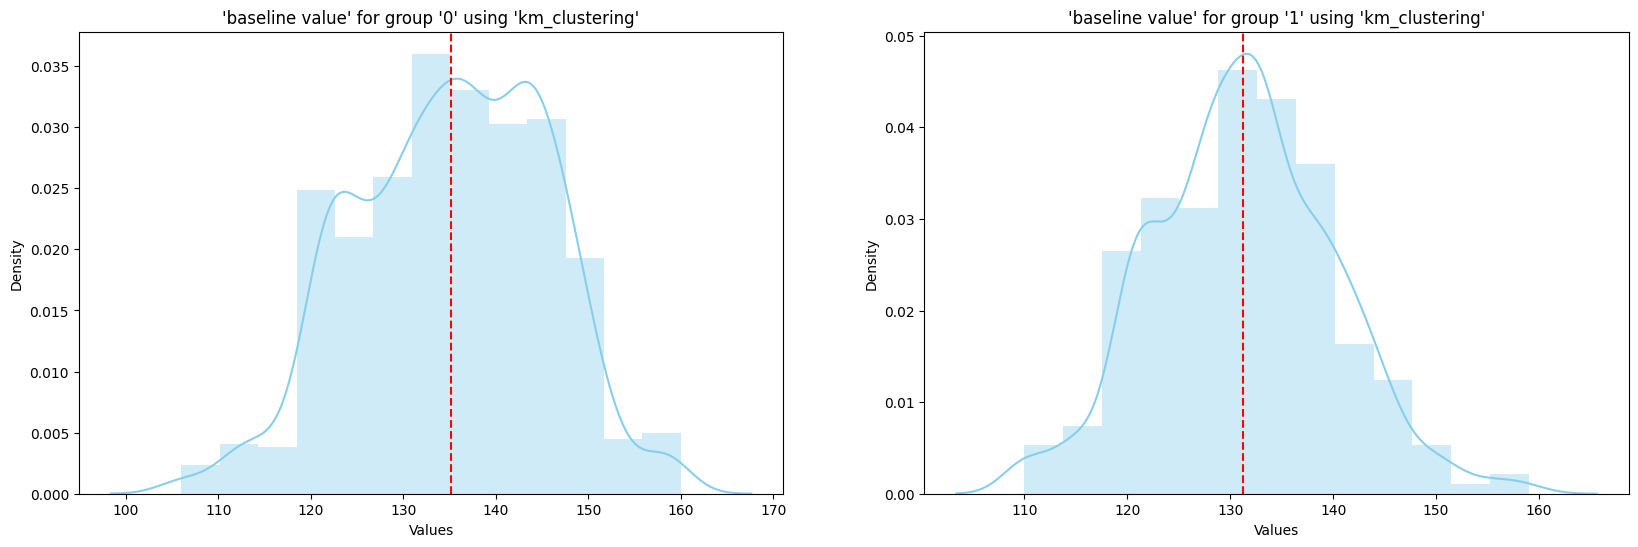

<Figure size 640x480 with 0 Axes>

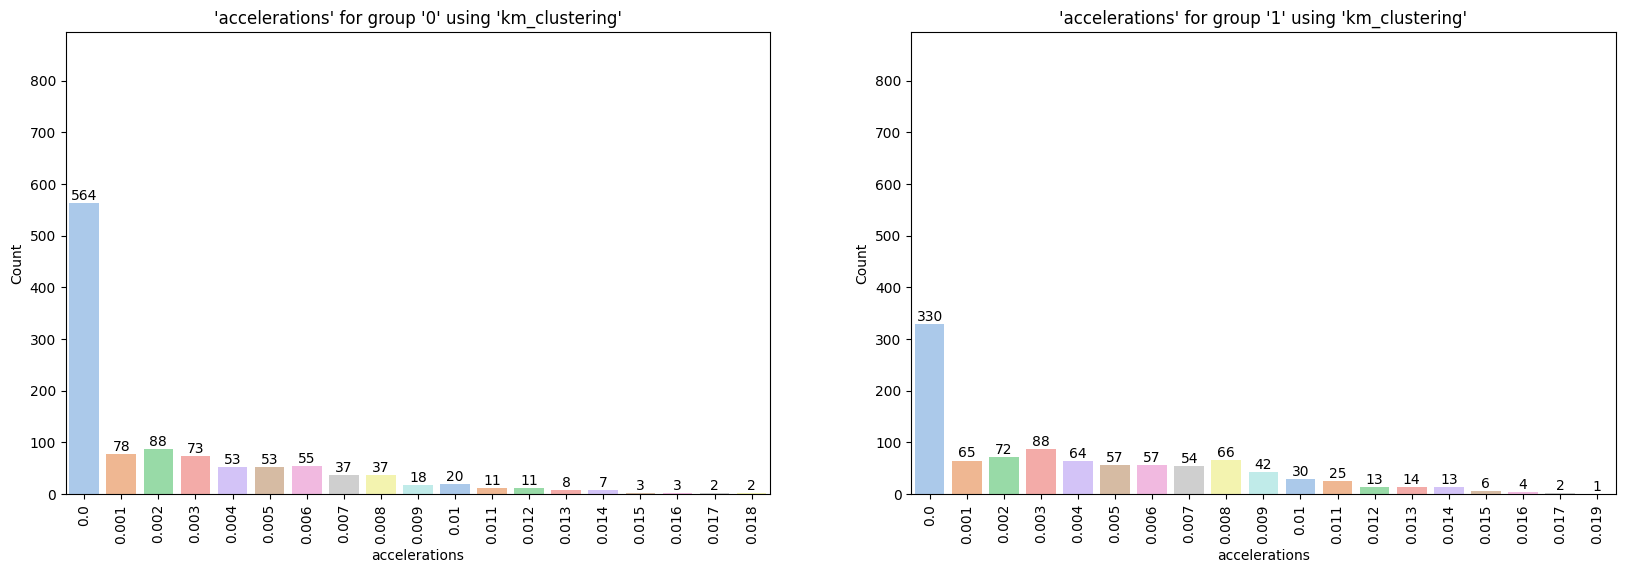

<Figure size 640x480 with 0 Axes>

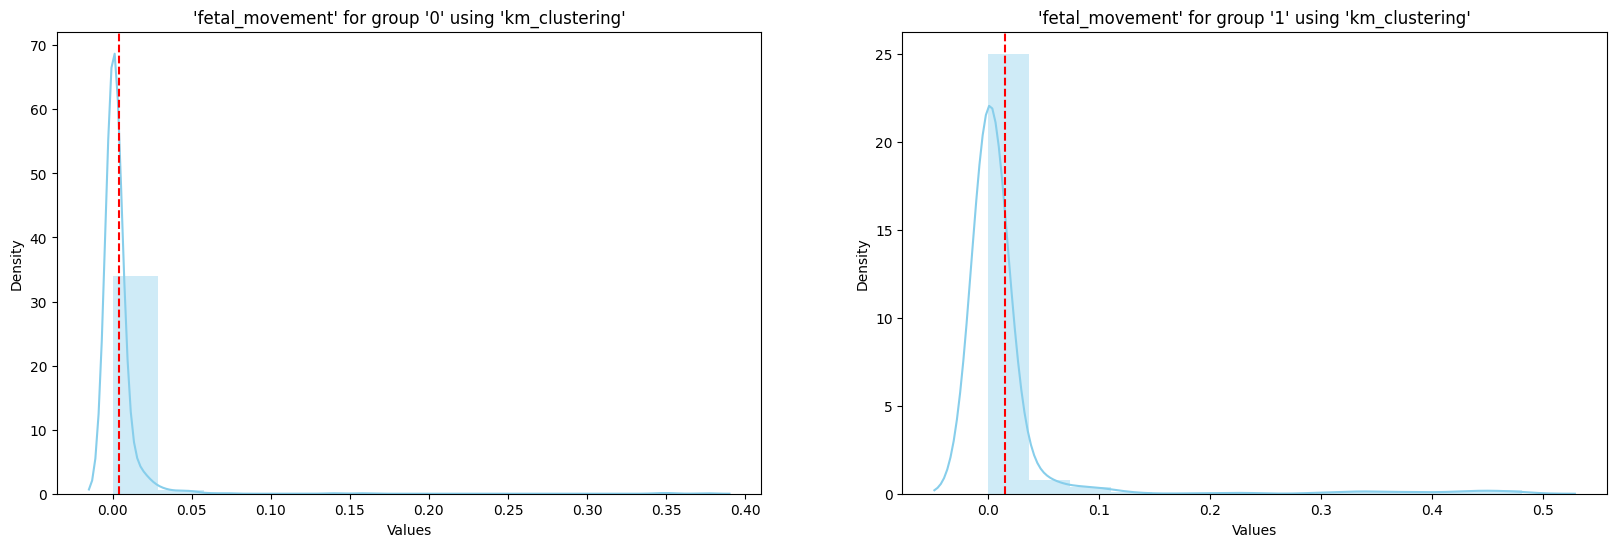

<Figure size 640x480 with 0 Axes>

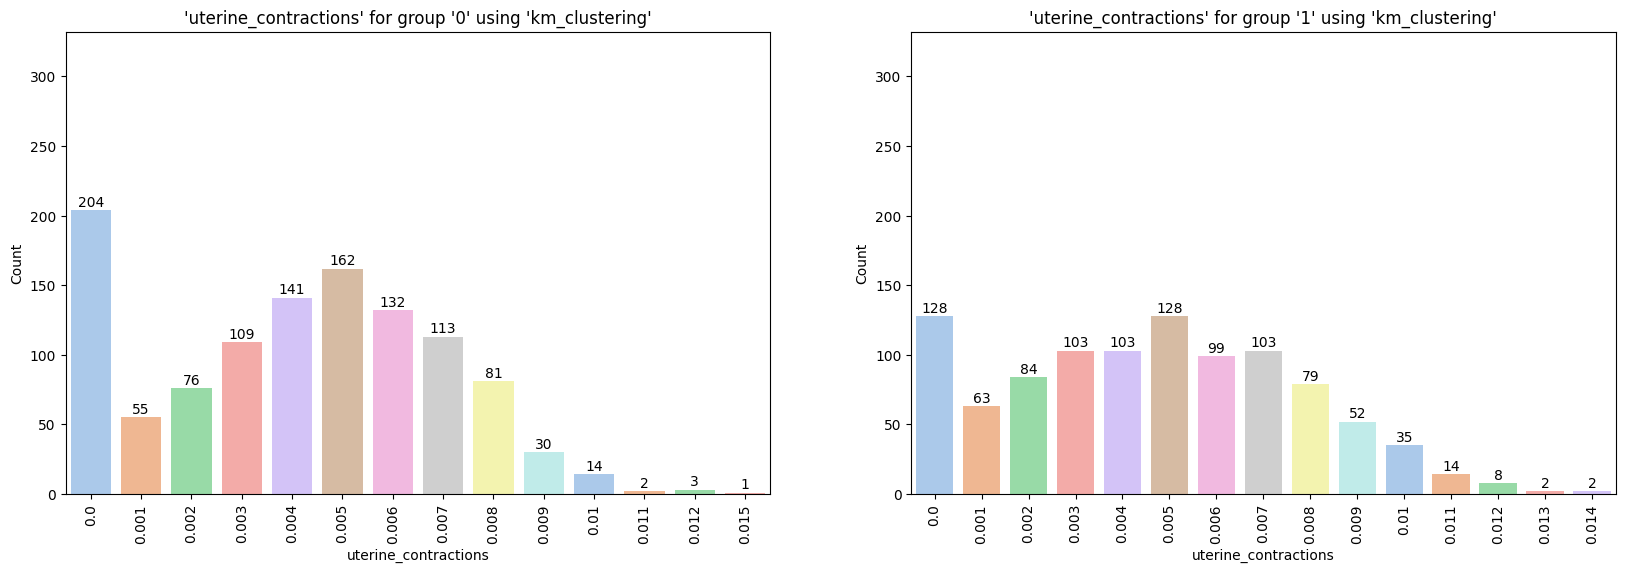

<Figure size 640x480 with 0 Axes>

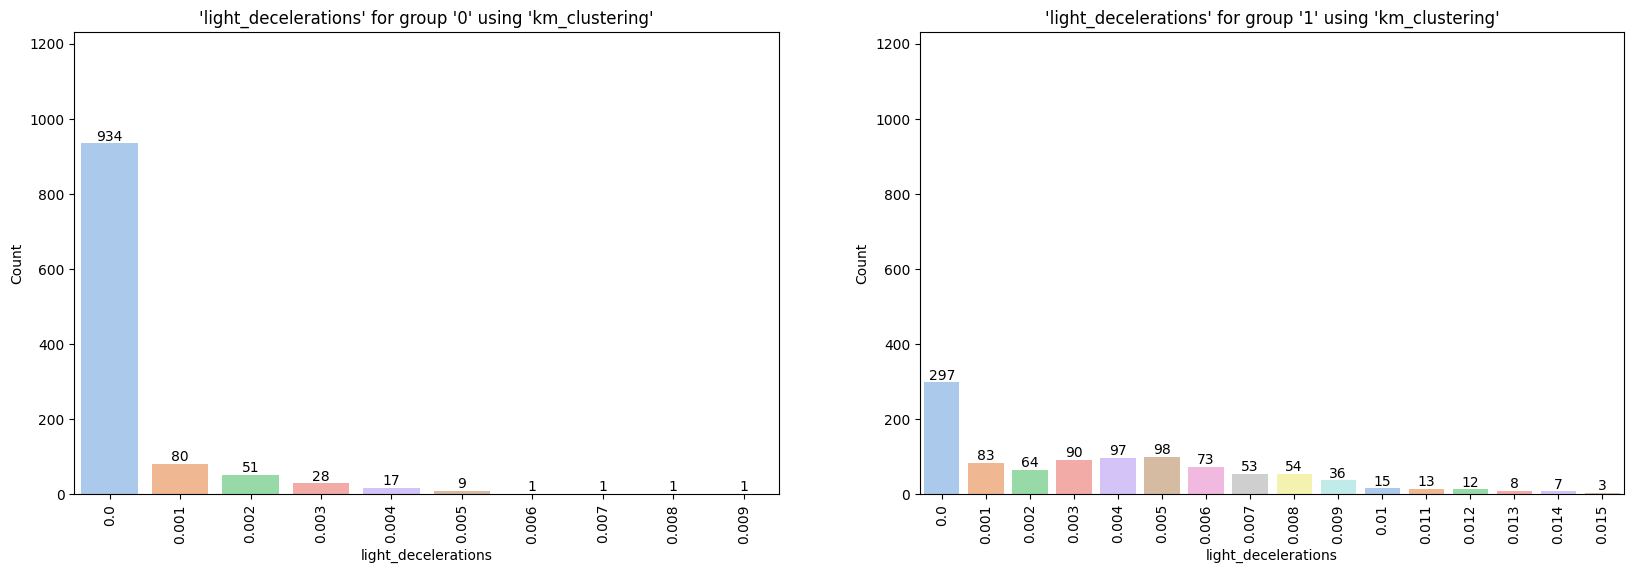

<Figure size 640x480 with 0 Axes>

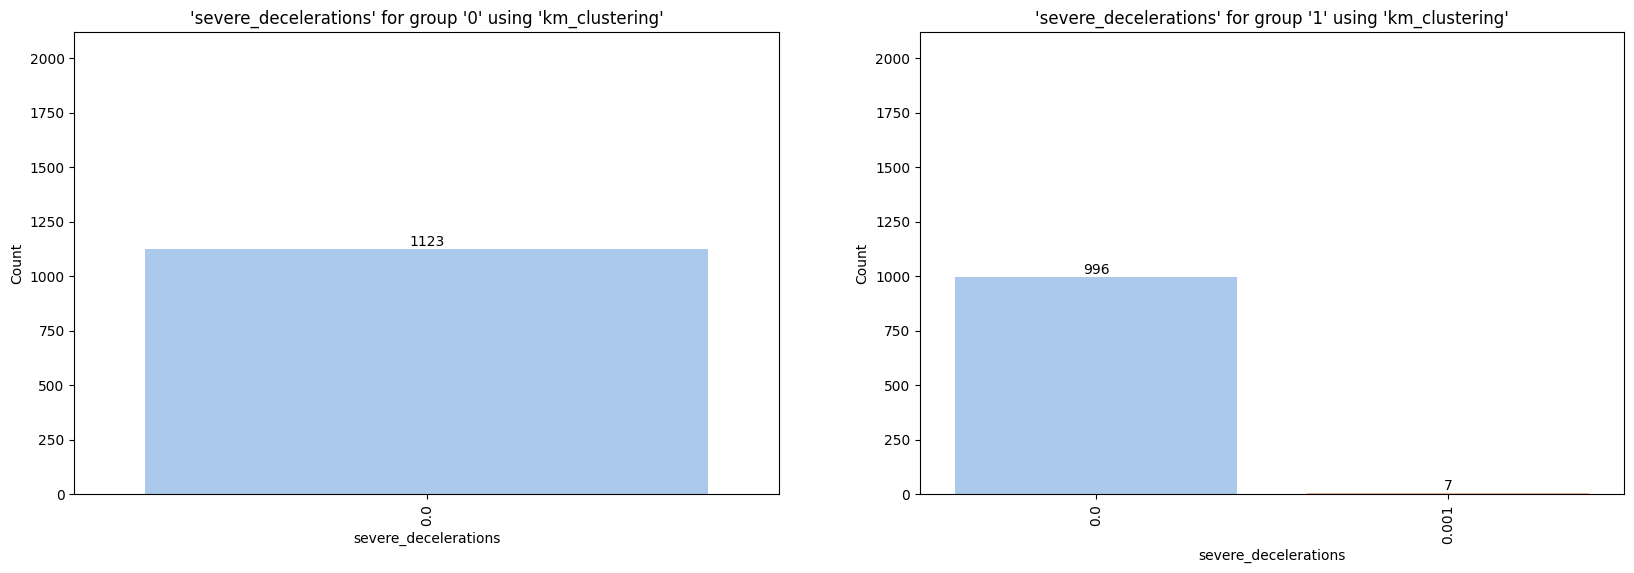

<Figure size 640x480 with 0 Axes>

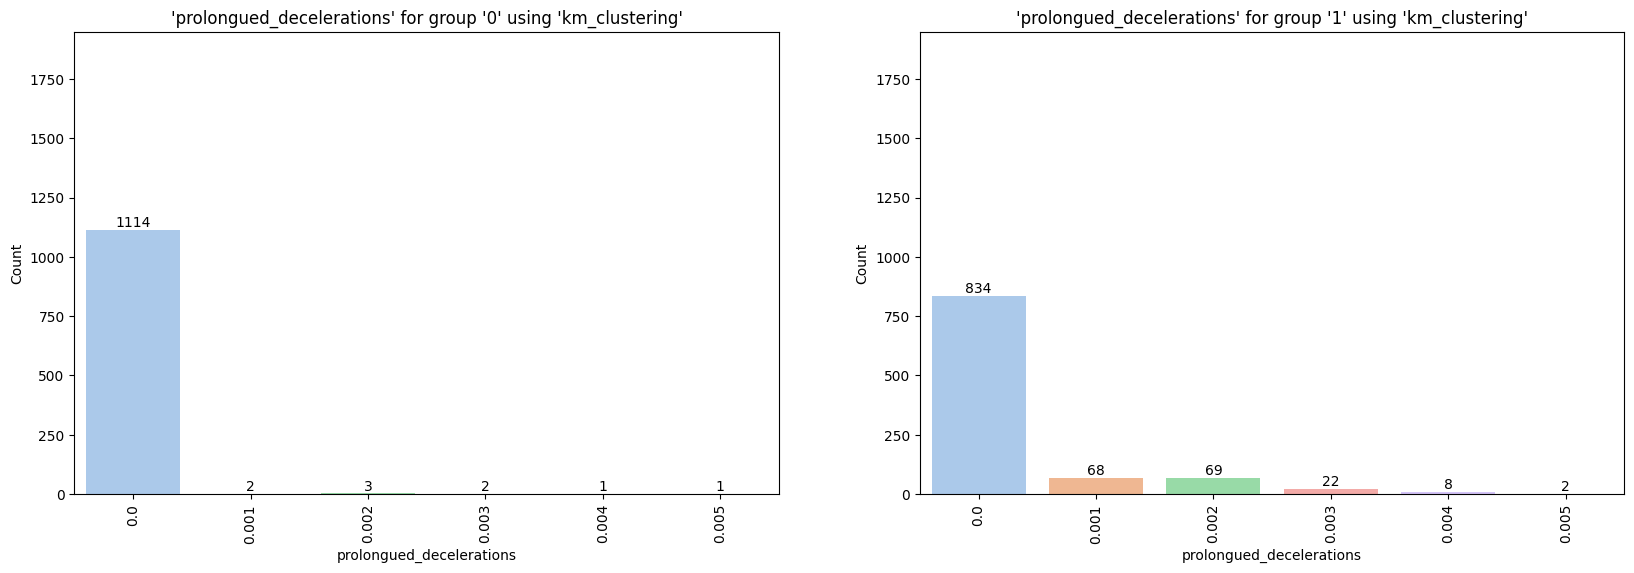

<Figure size 640x480 with 0 Axes>

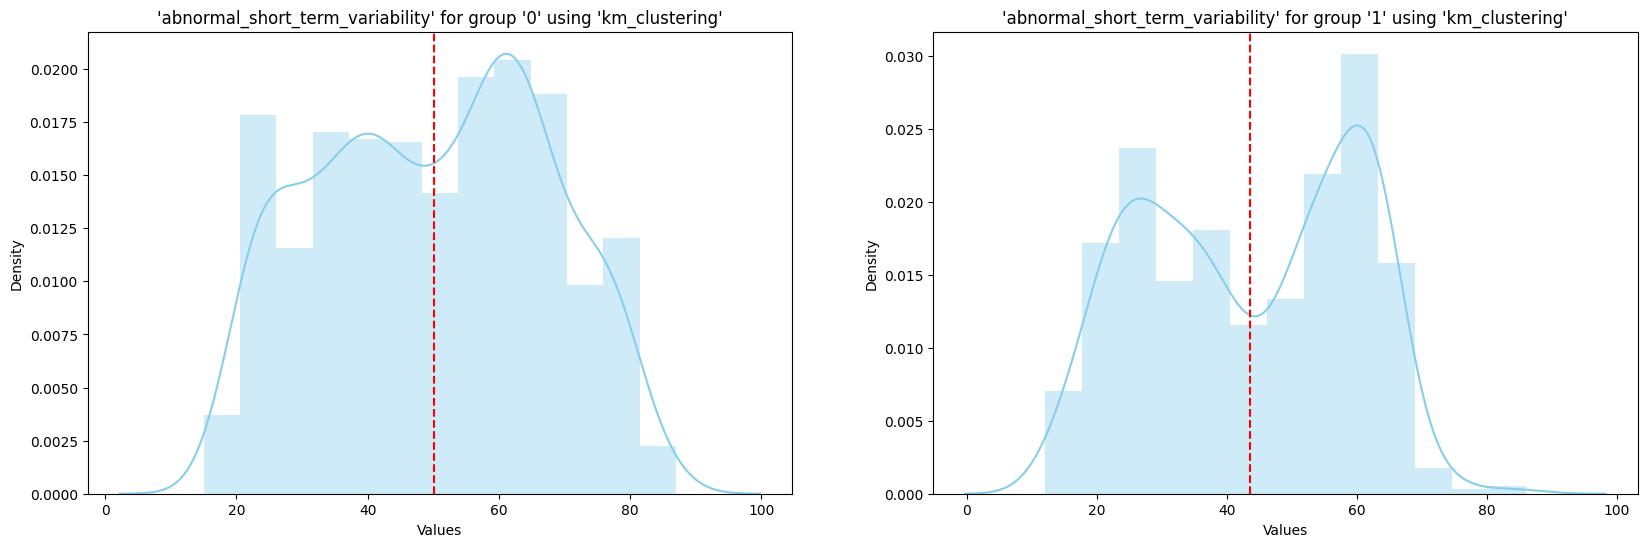

<Figure size 640x480 with 0 Axes>

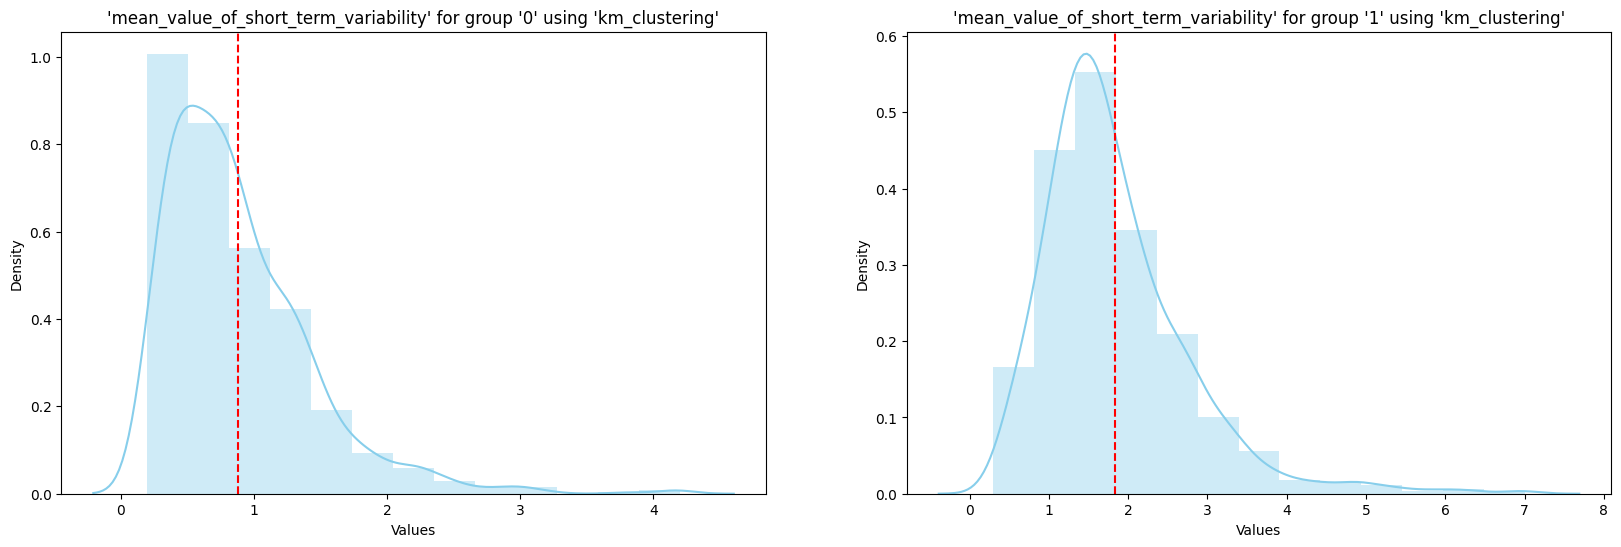

<Figure size 640x480 with 0 Axes>

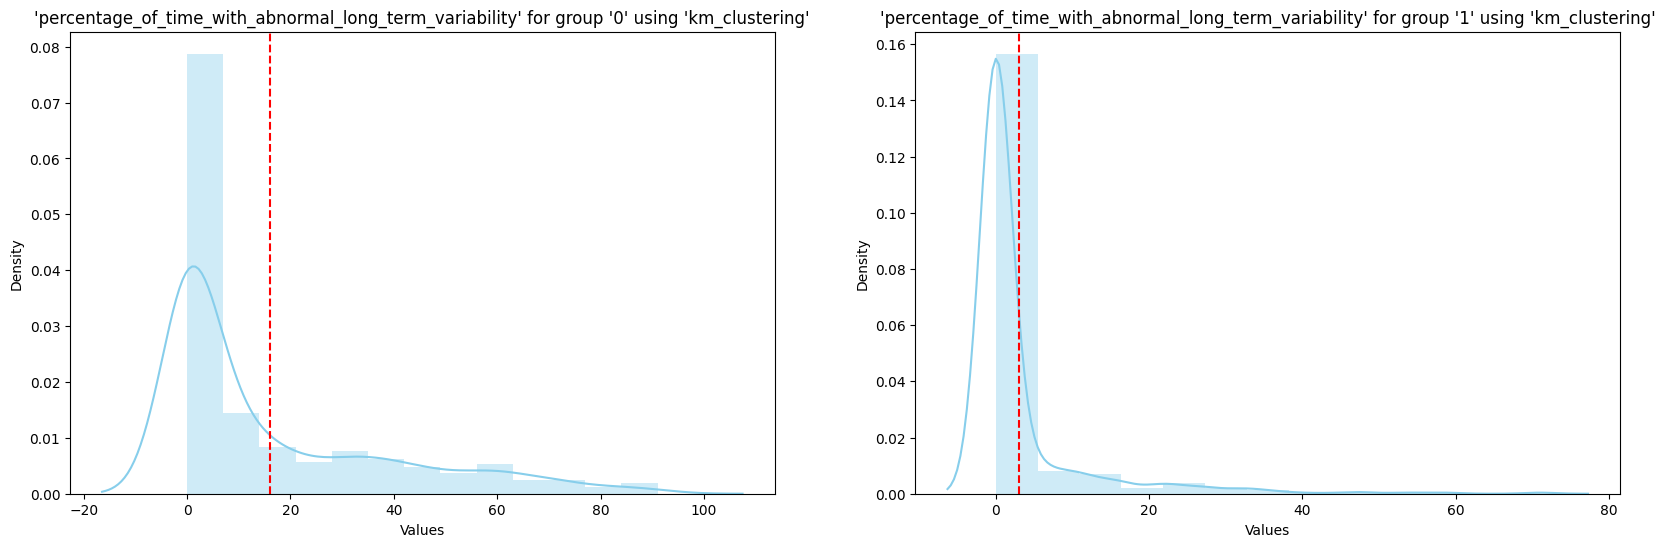

<Figure size 640x480 with 0 Axes>

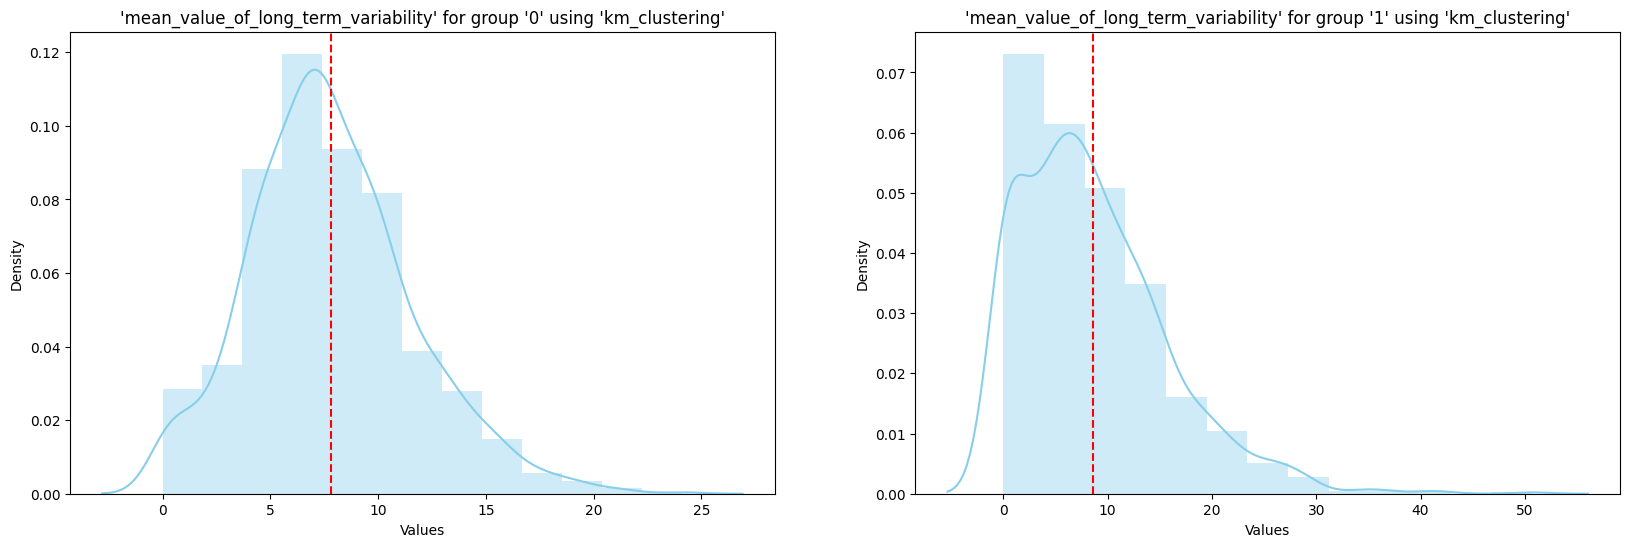

<Figure size 640x480 with 0 Axes>

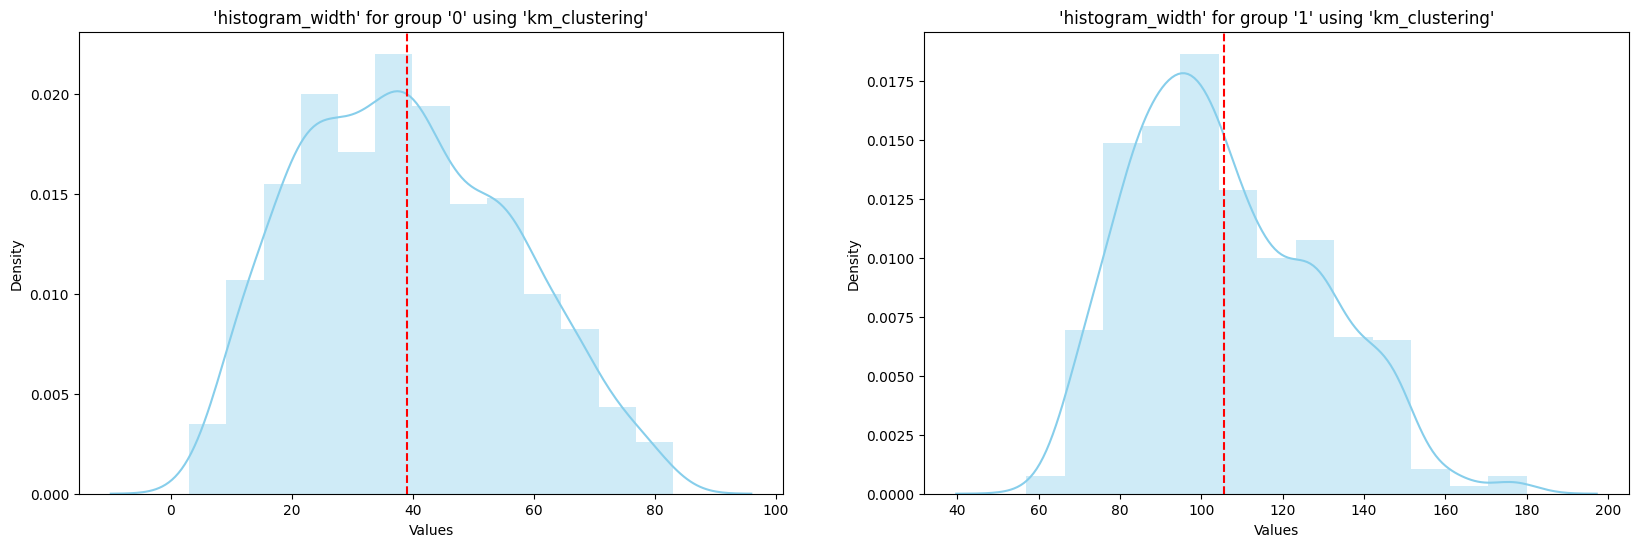

<Figure size 640x480 with 0 Axes>

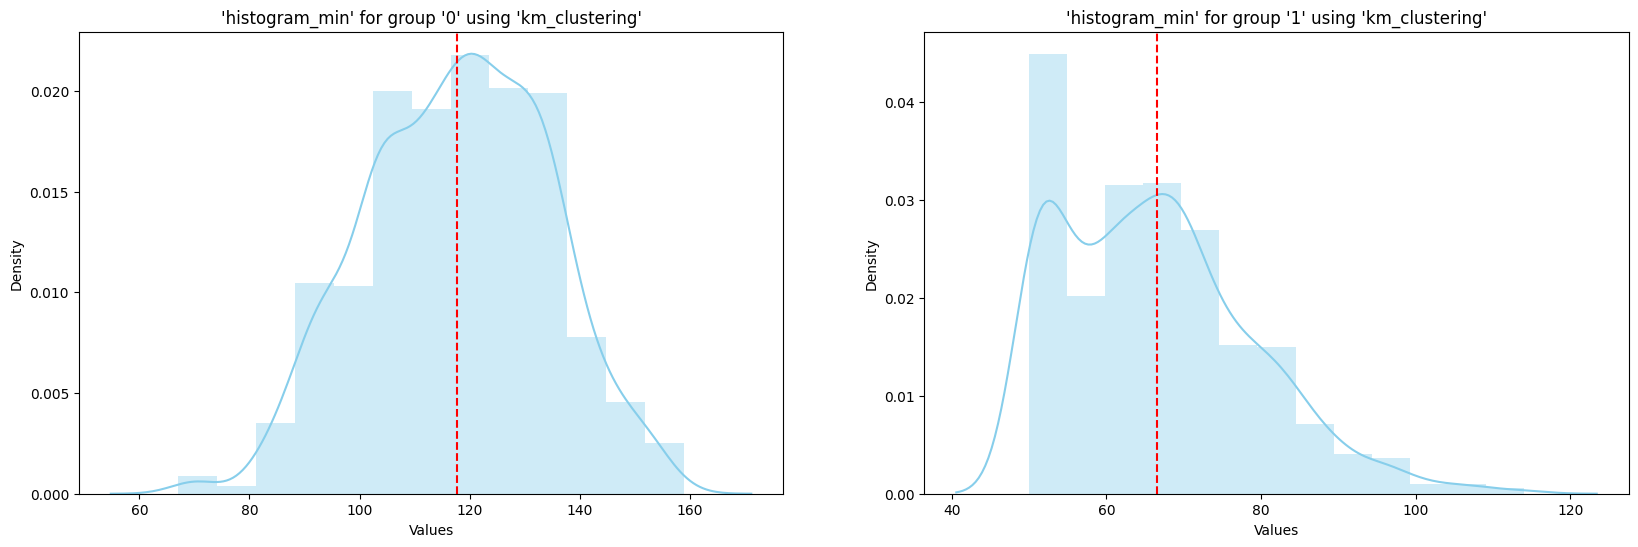

<Figure size 640x480 with 0 Axes>

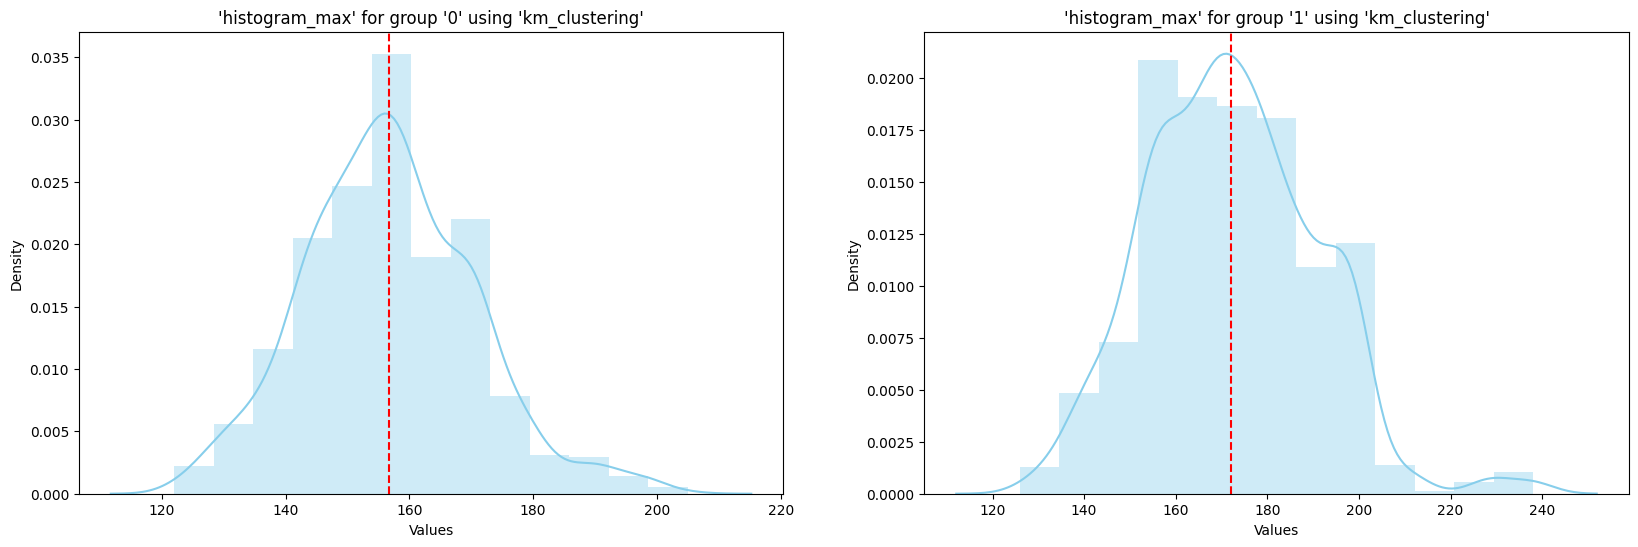

<Figure size 640x480 with 0 Axes>

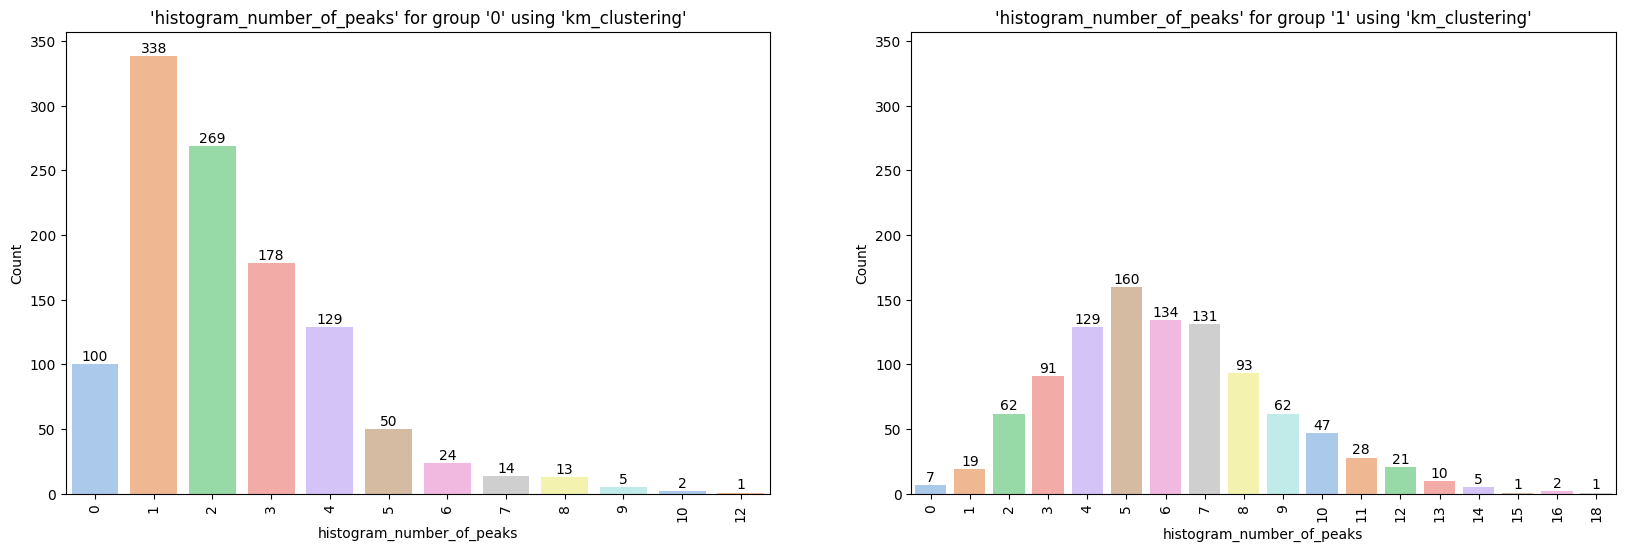

<Figure size 640x480 with 0 Axes>

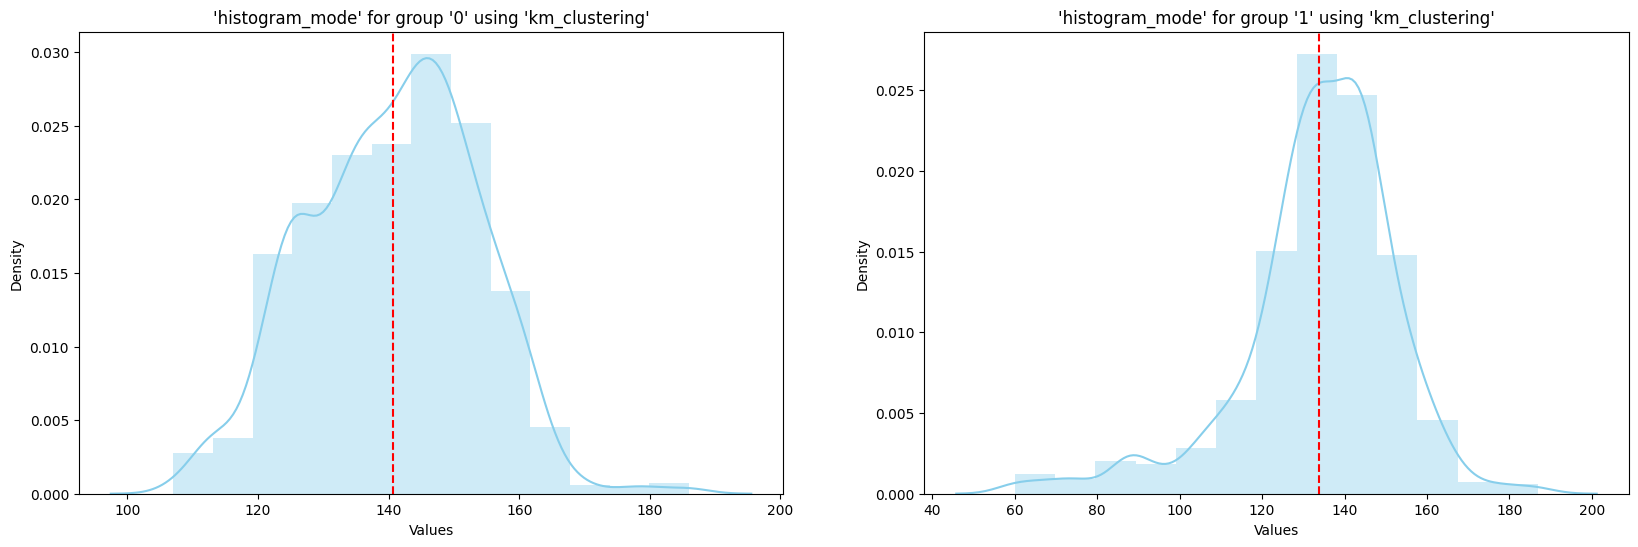

<Figure size 640x480 with 0 Axes>

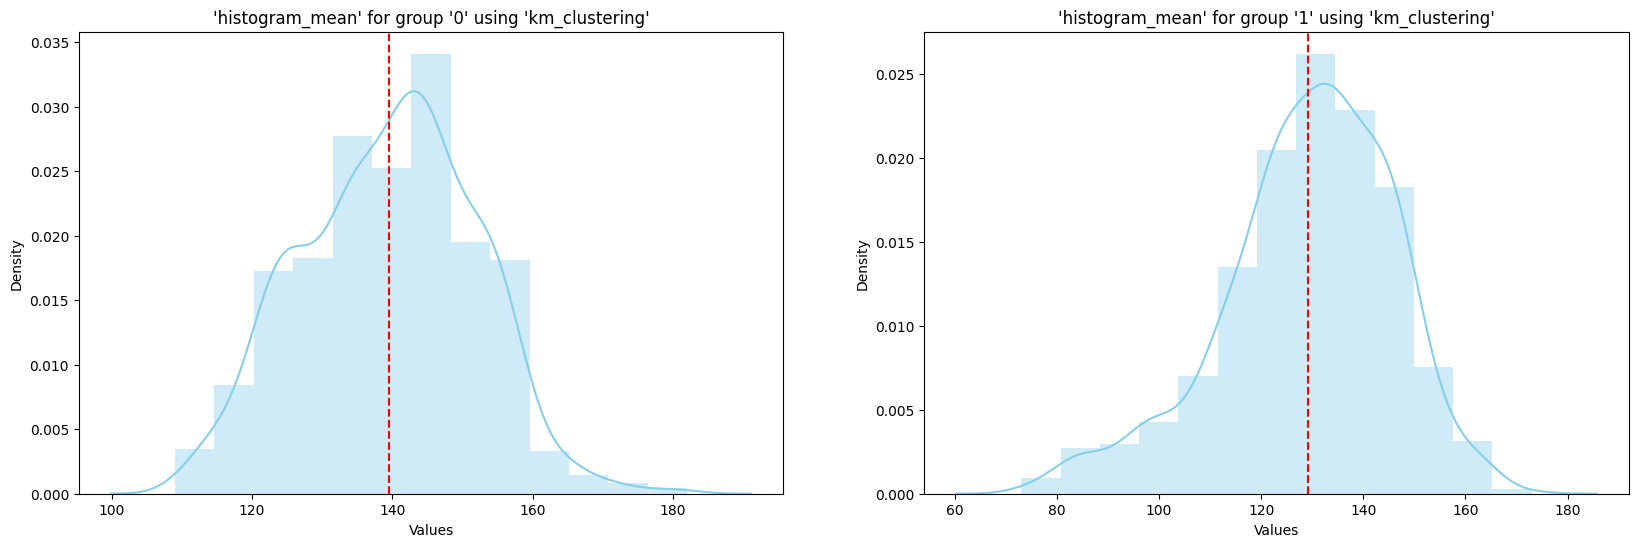

<Figure size 640x480 with 0 Axes>

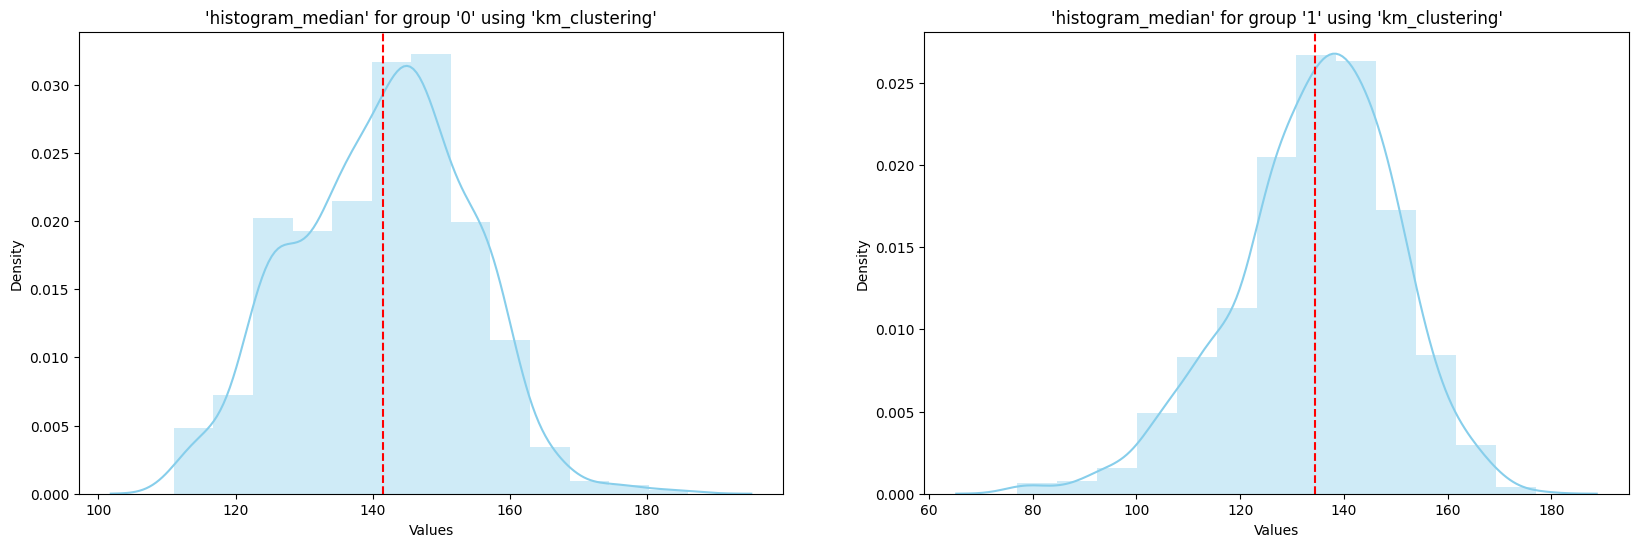

<Figure size 640x480 with 0 Axes>

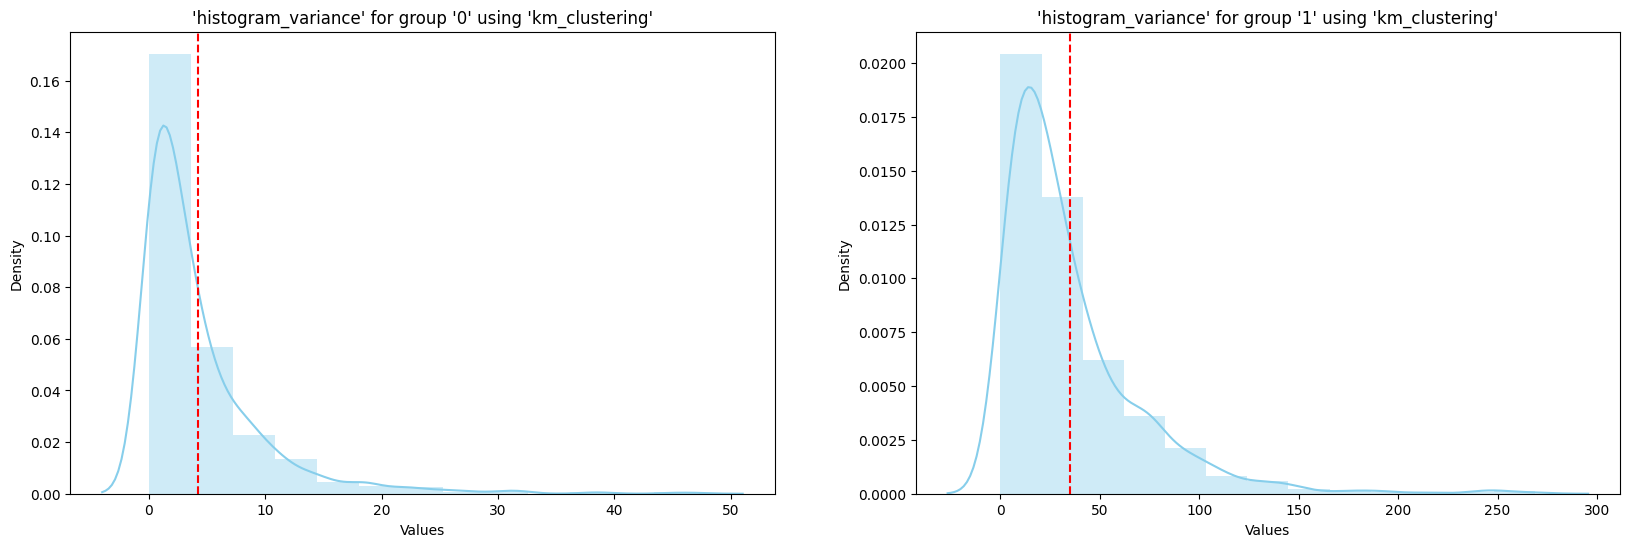

Clustering method:  bkm_clustering


<Figure size 640x480 with 0 Axes>

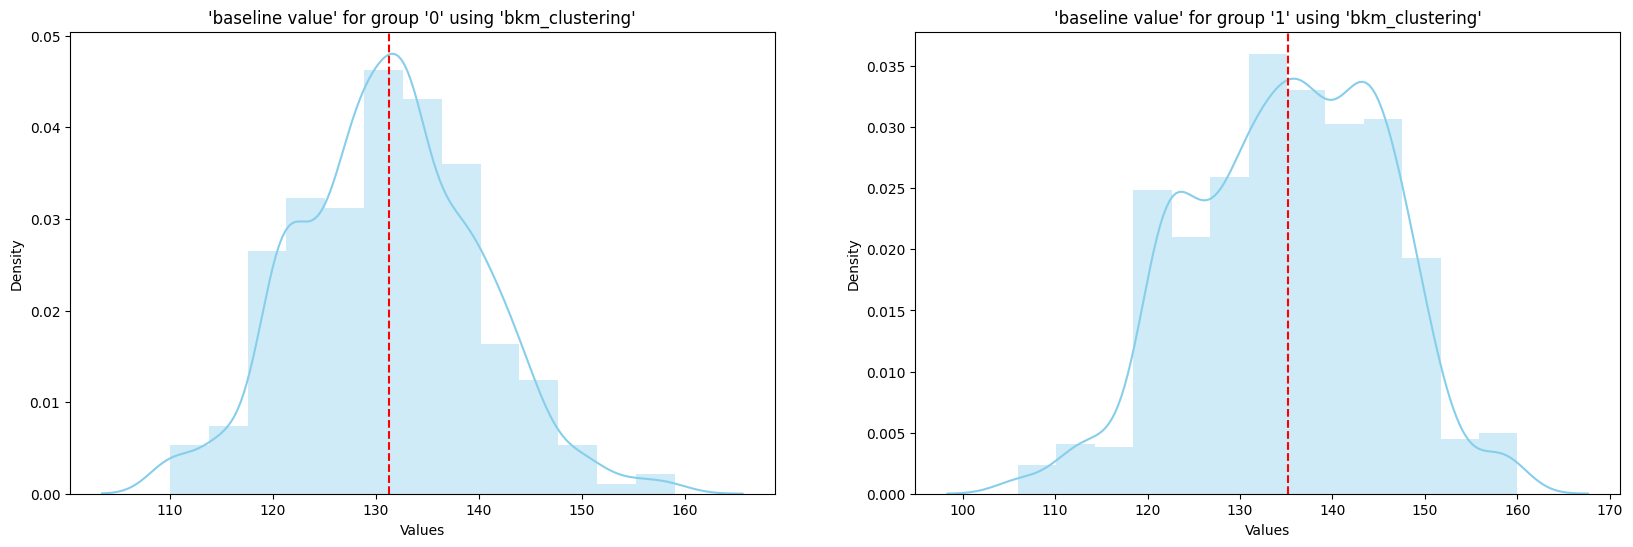

<Figure size 640x480 with 0 Axes>

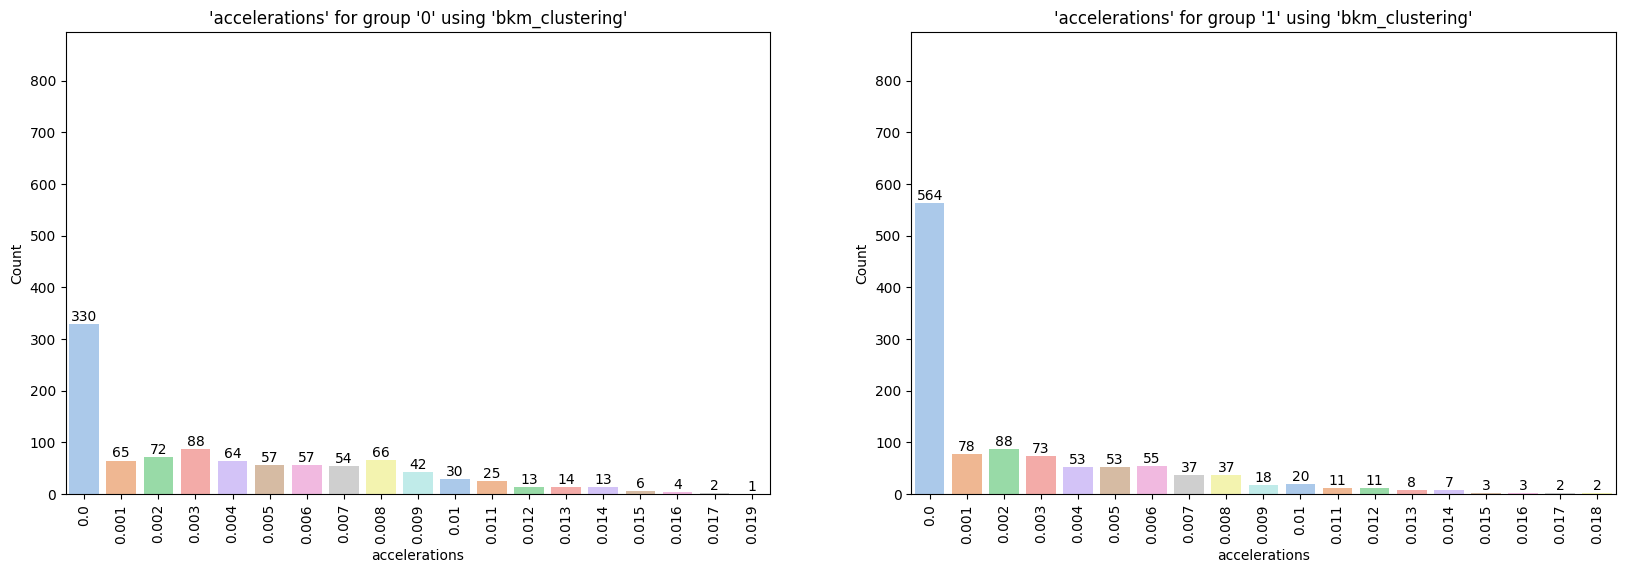

<Figure size 640x480 with 0 Axes>

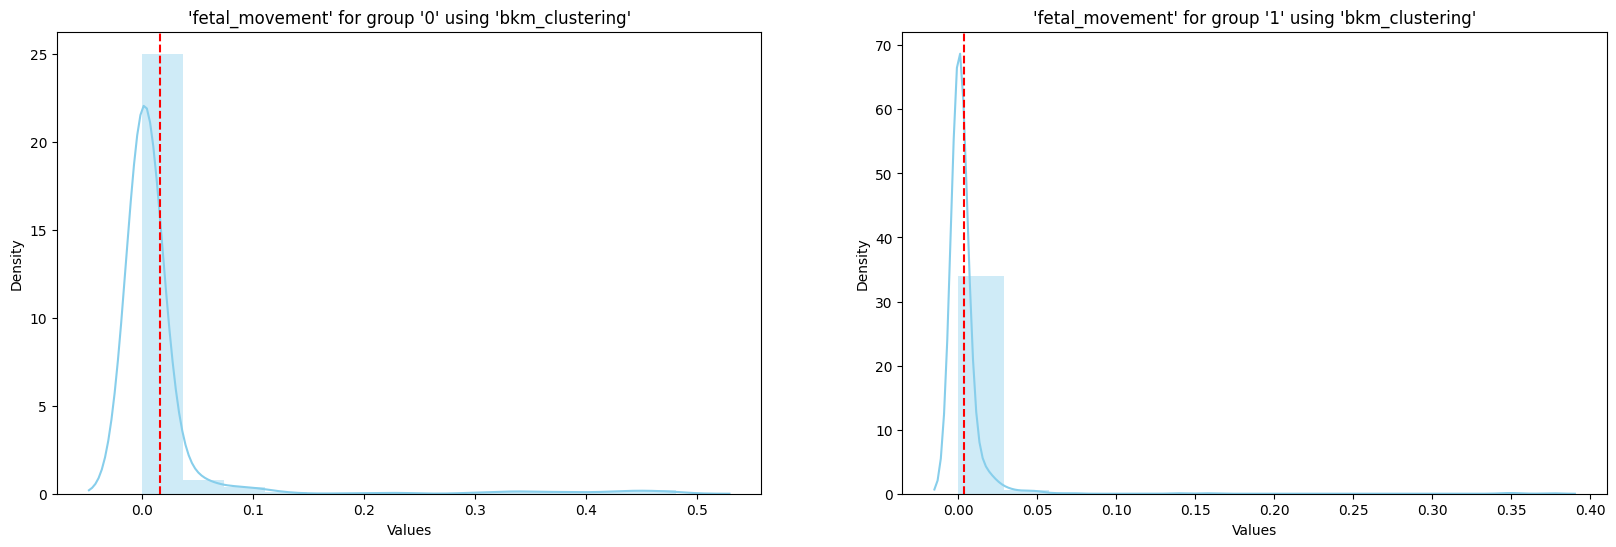

<Figure size 640x480 with 0 Axes>

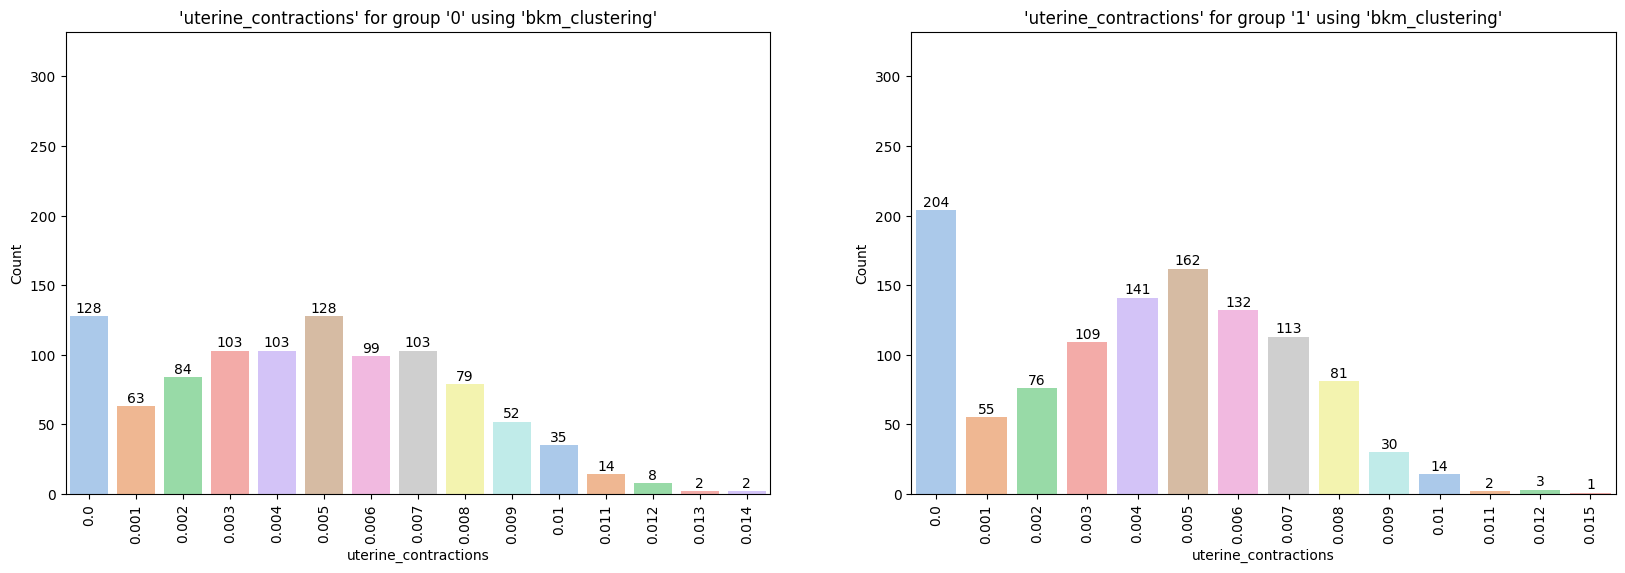

<Figure size 640x480 with 0 Axes>

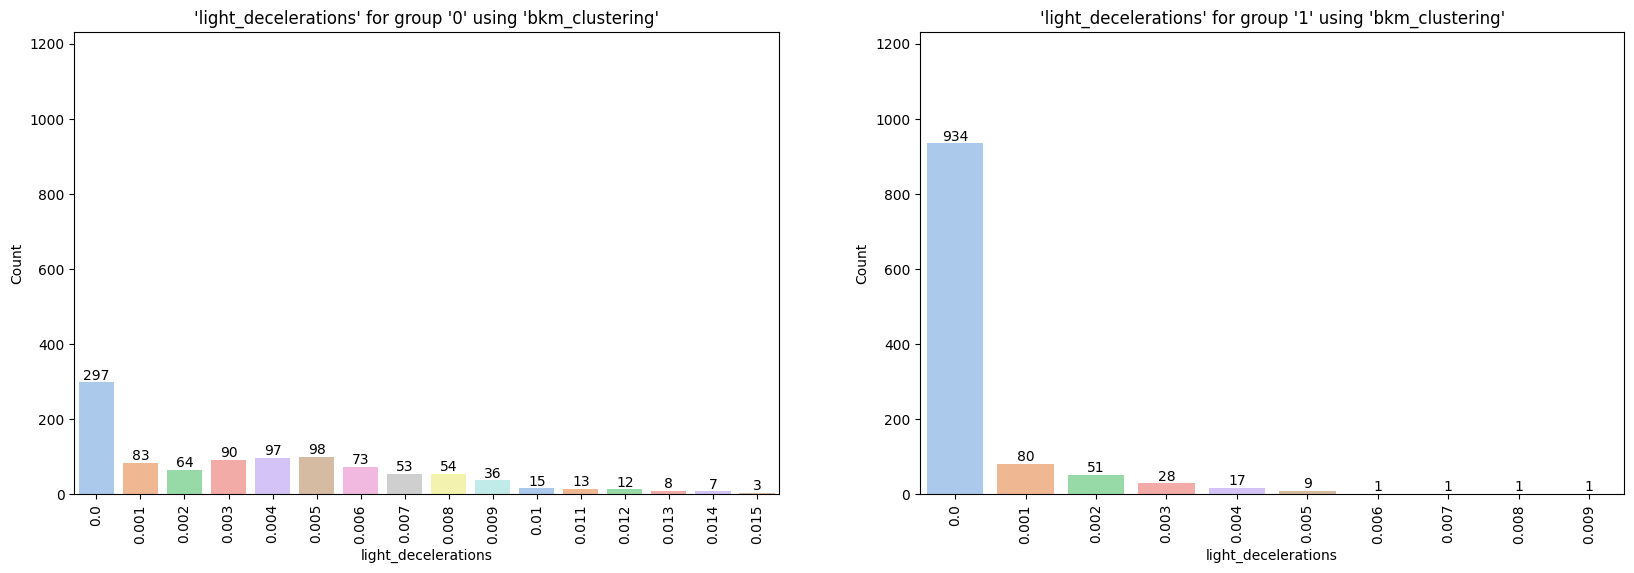

<Figure size 640x480 with 0 Axes>

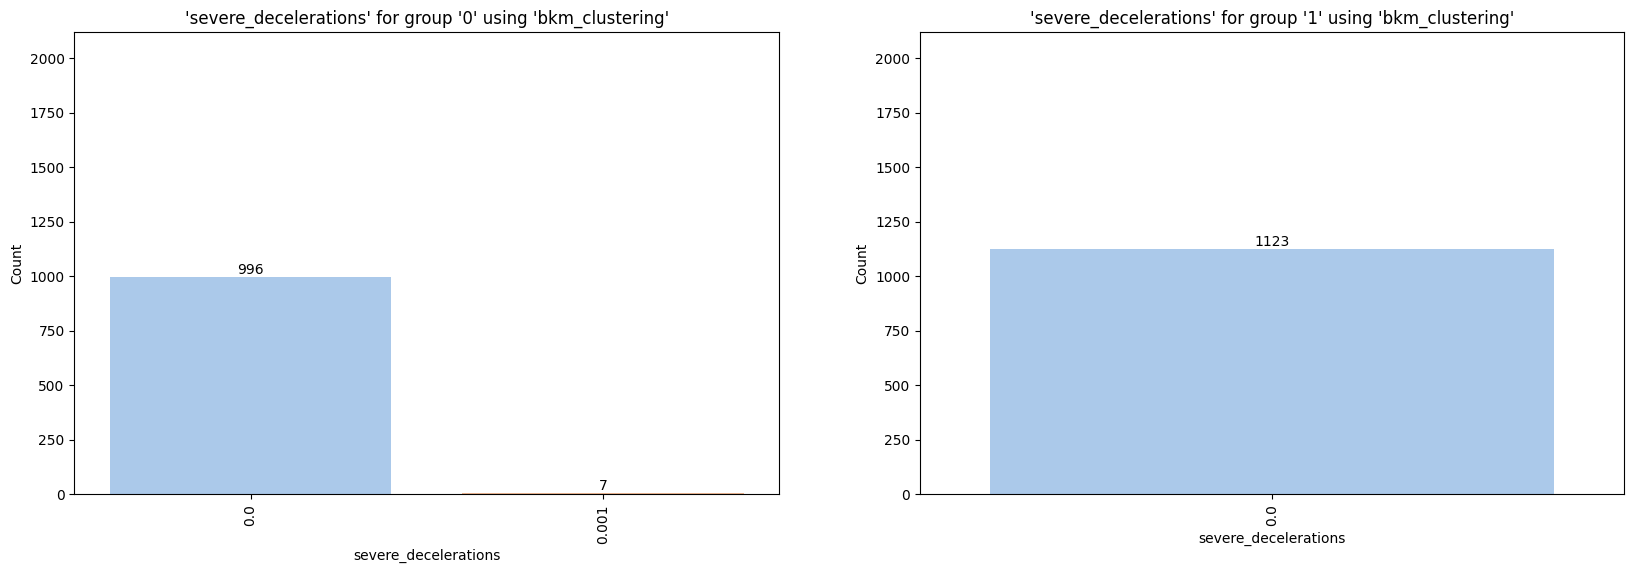

<Figure size 640x480 with 0 Axes>

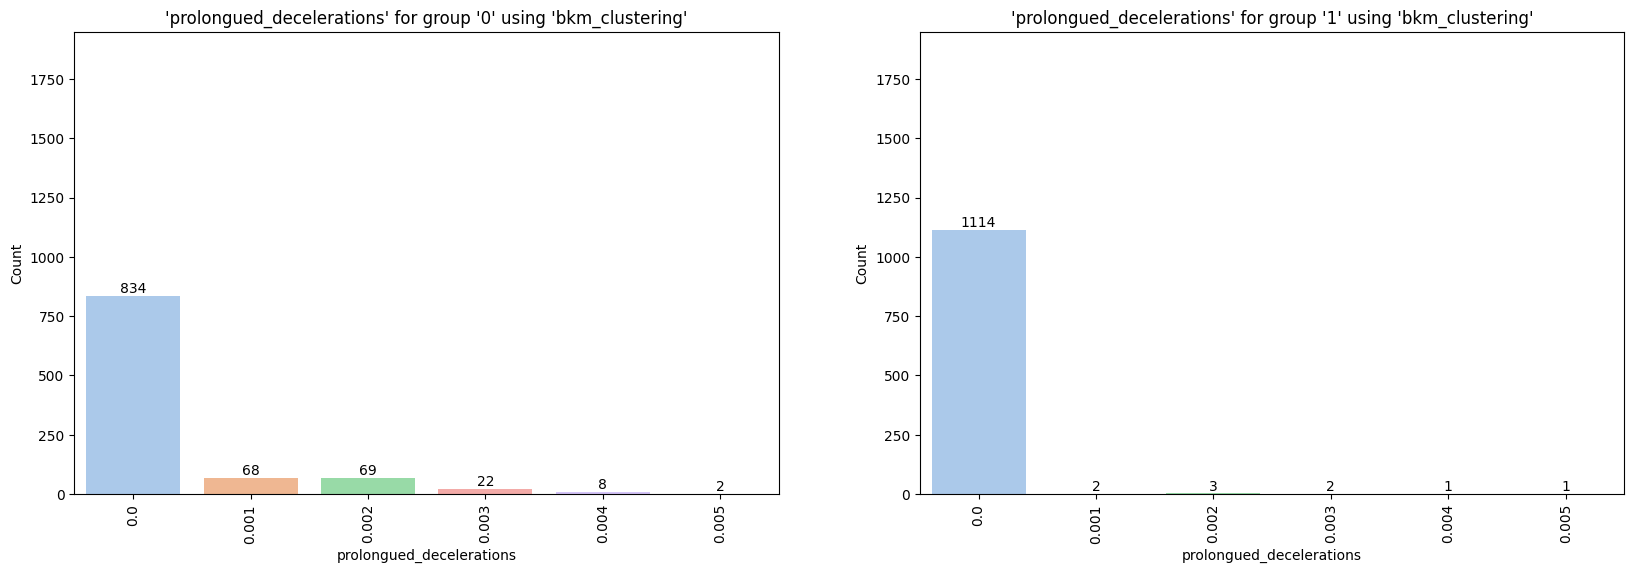

<Figure size 640x480 with 0 Axes>

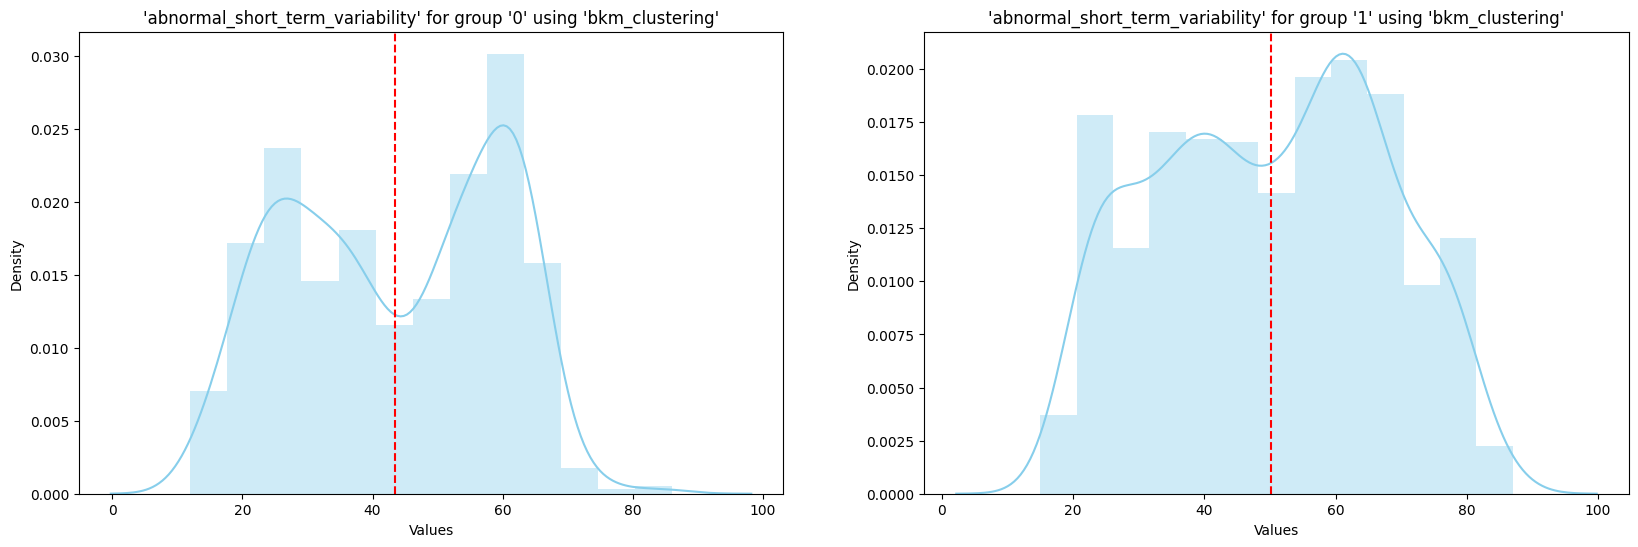

<Figure size 640x480 with 0 Axes>

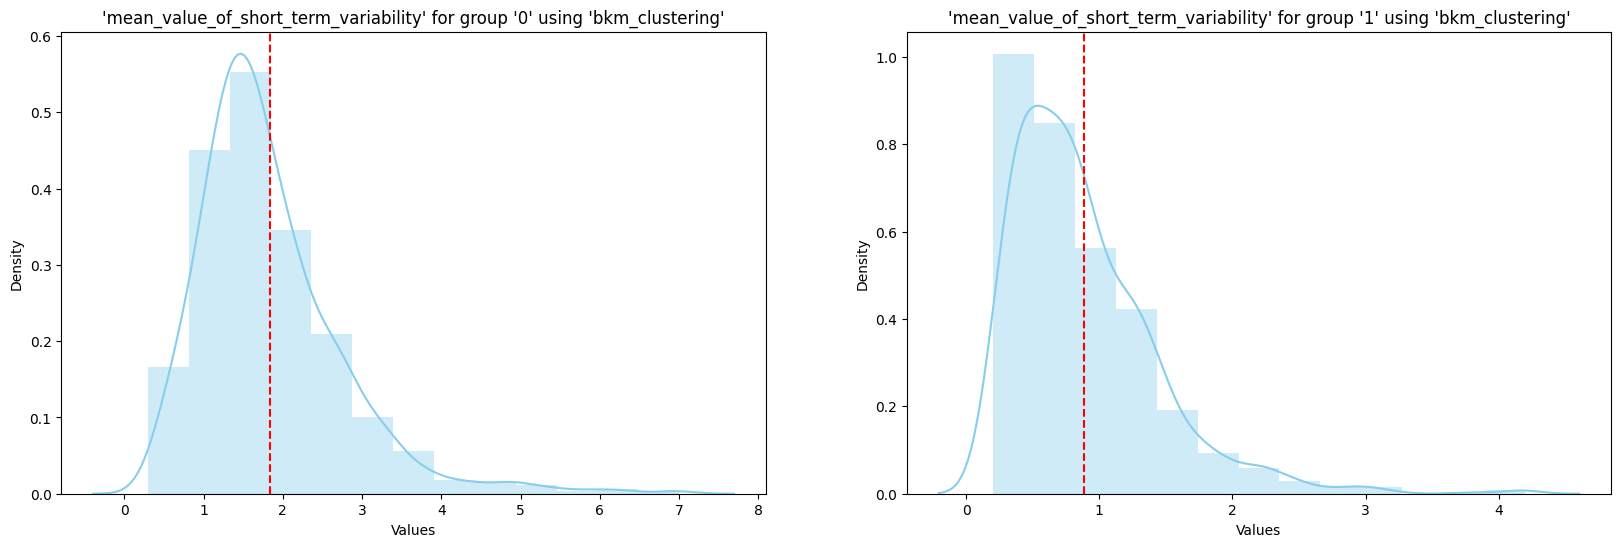

<Figure size 640x480 with 0 Axes>

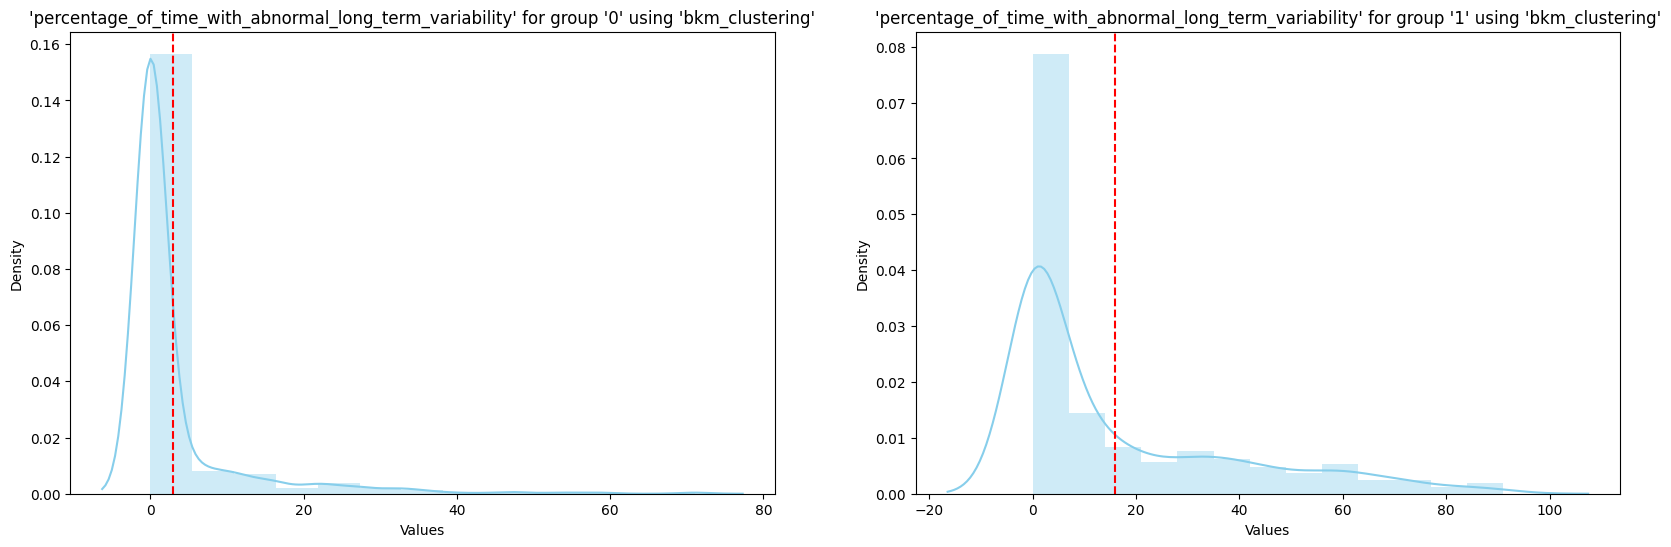

<Figure size 640x480 with 0 Axes>

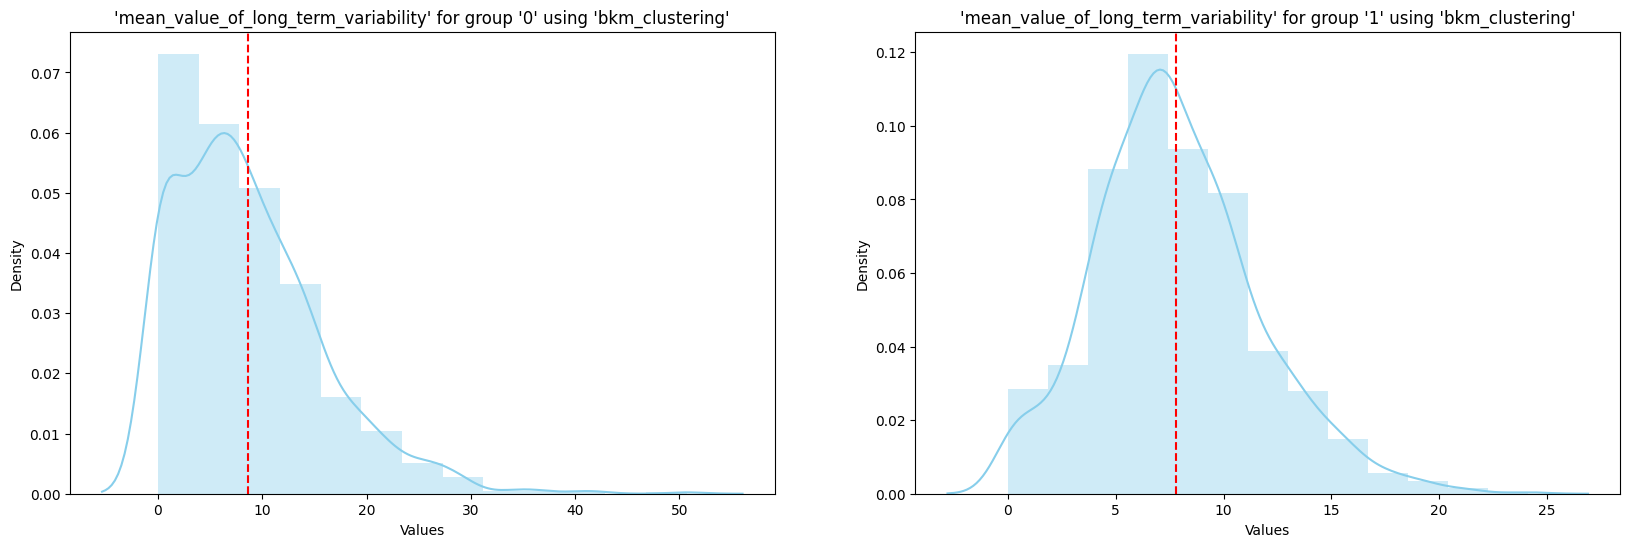

<Figure size 640x480 with 0 Axes>

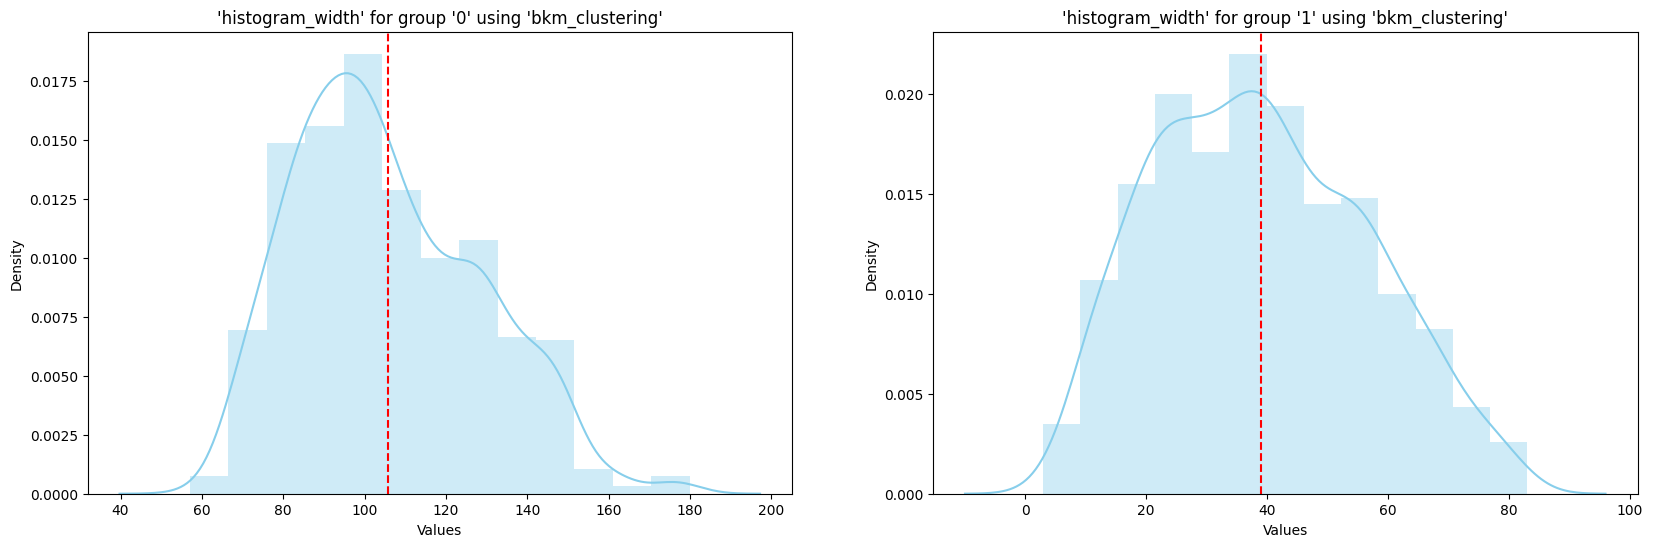

<Figure size 640x480 with 0 Axes>

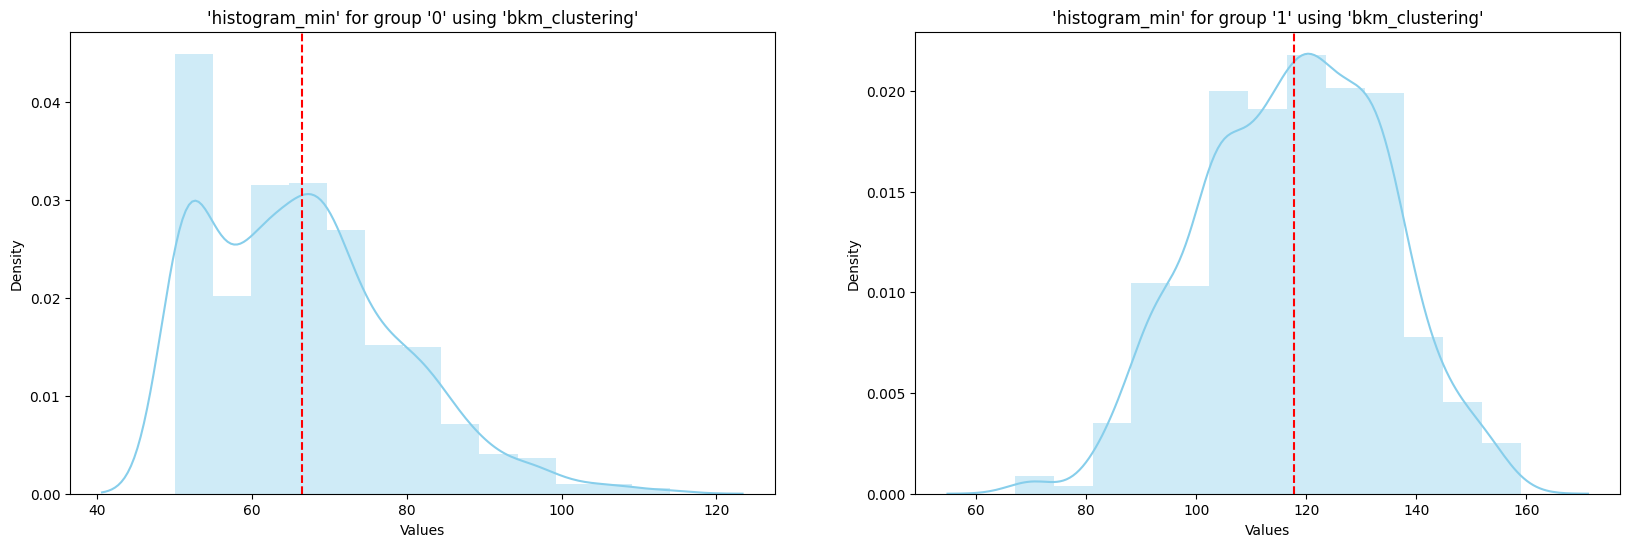

<Figure size 640x480 with 0 Axes>

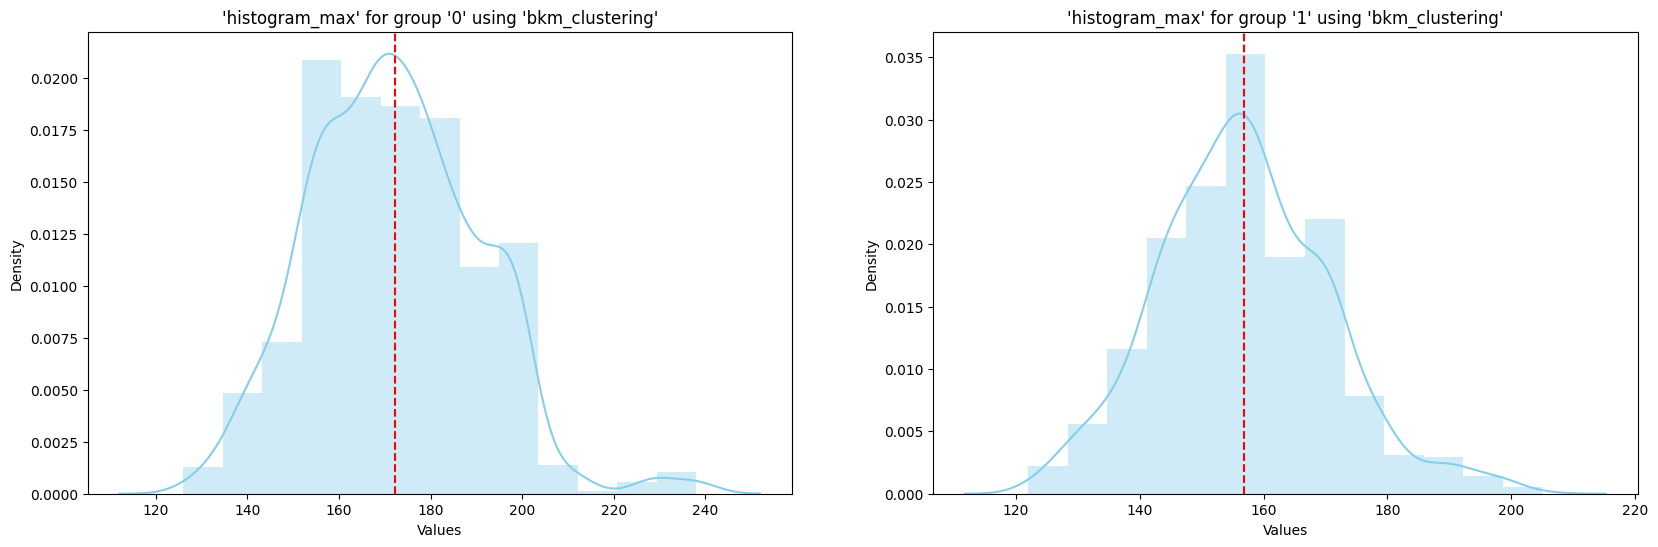

<Figure size 640x480 with 0 Axes>

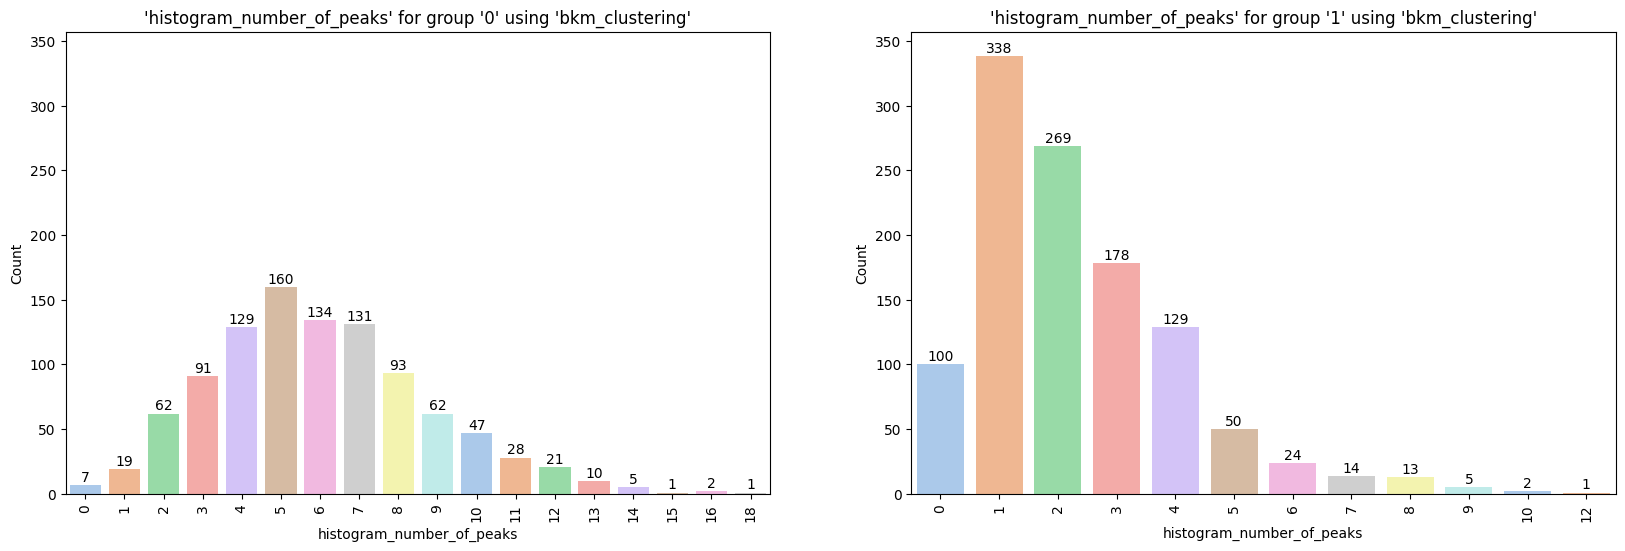

<Figure size 640x480 with 0 Axes>

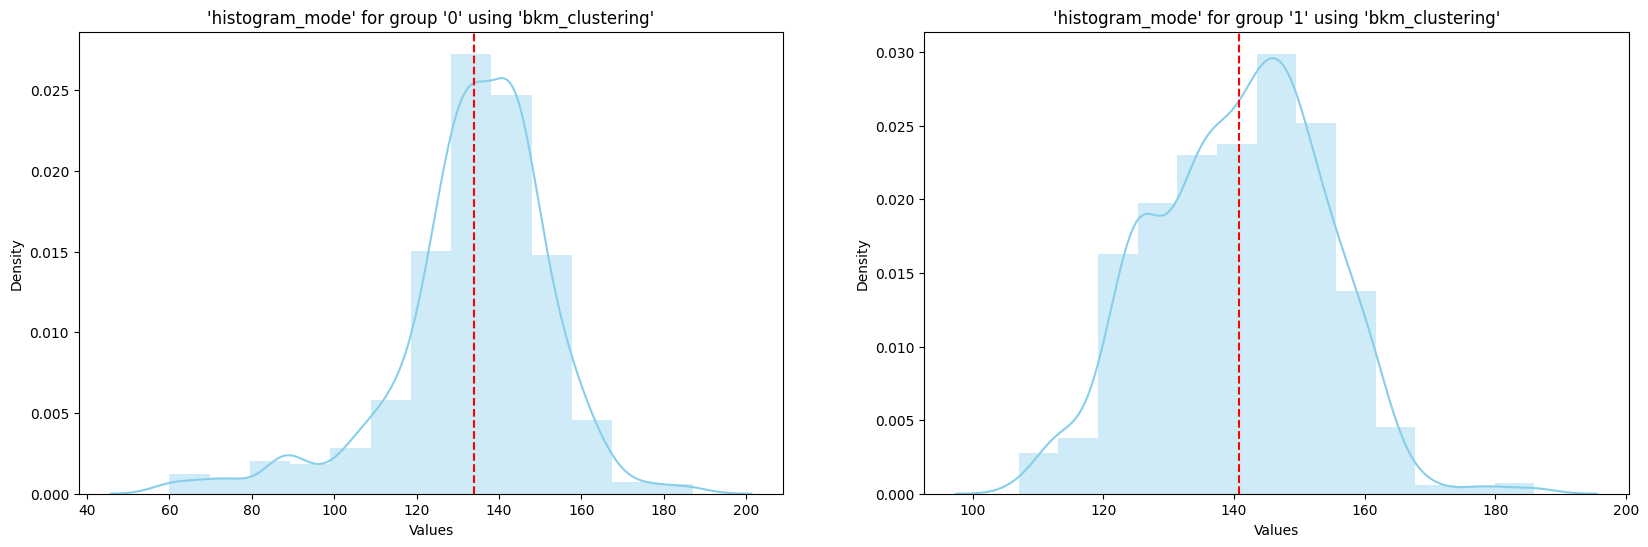

<Figure size 640x480 with 0 Axes>

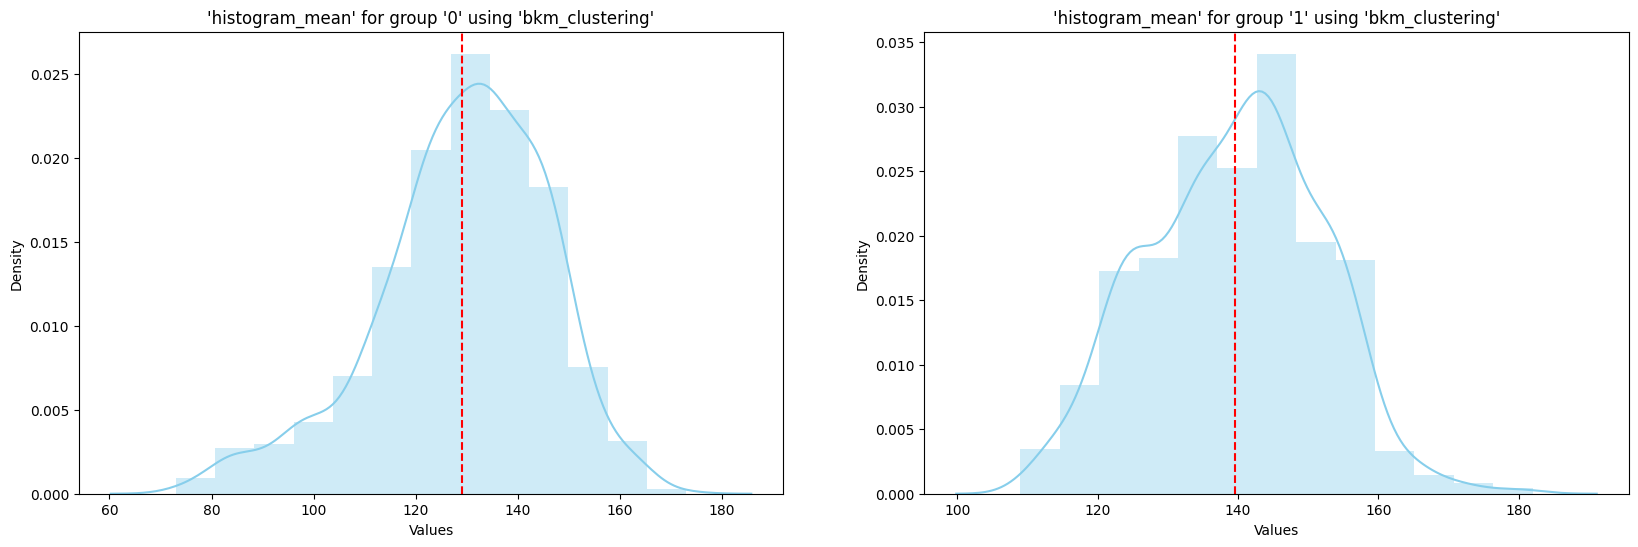

<Figure size 640x480 with 0 Axes>

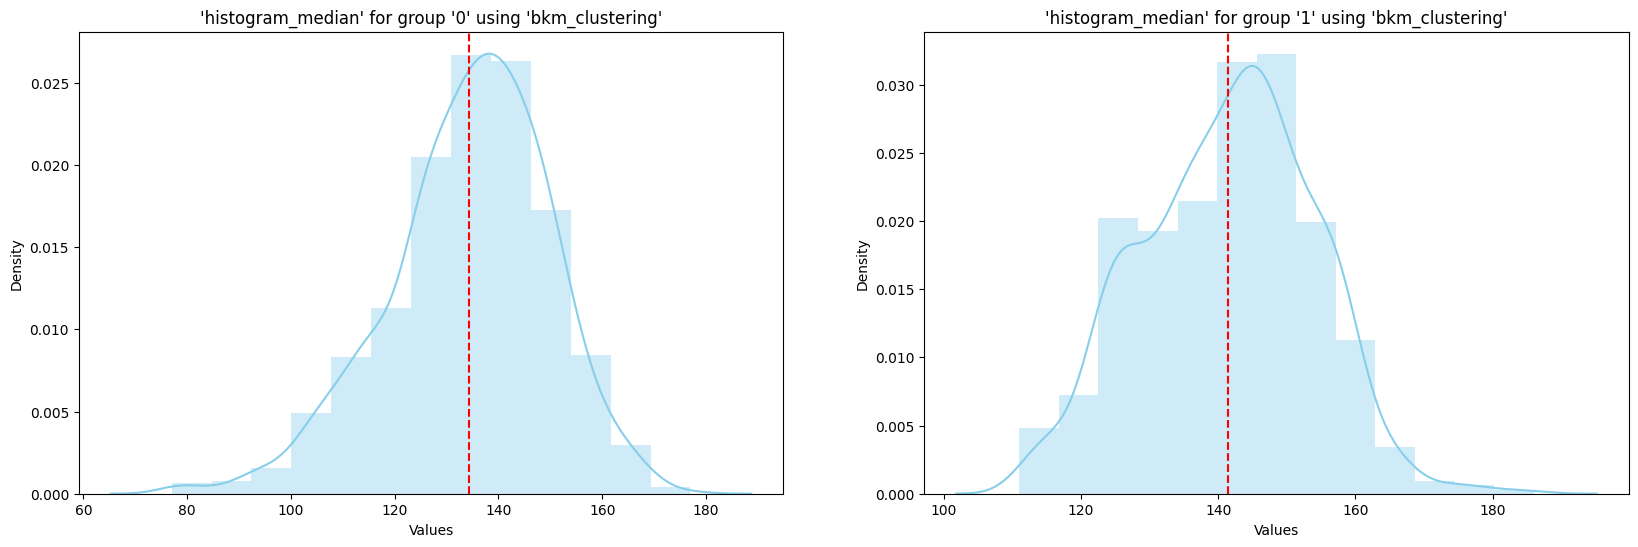

<Figure size 640x480 with 0 Axes>

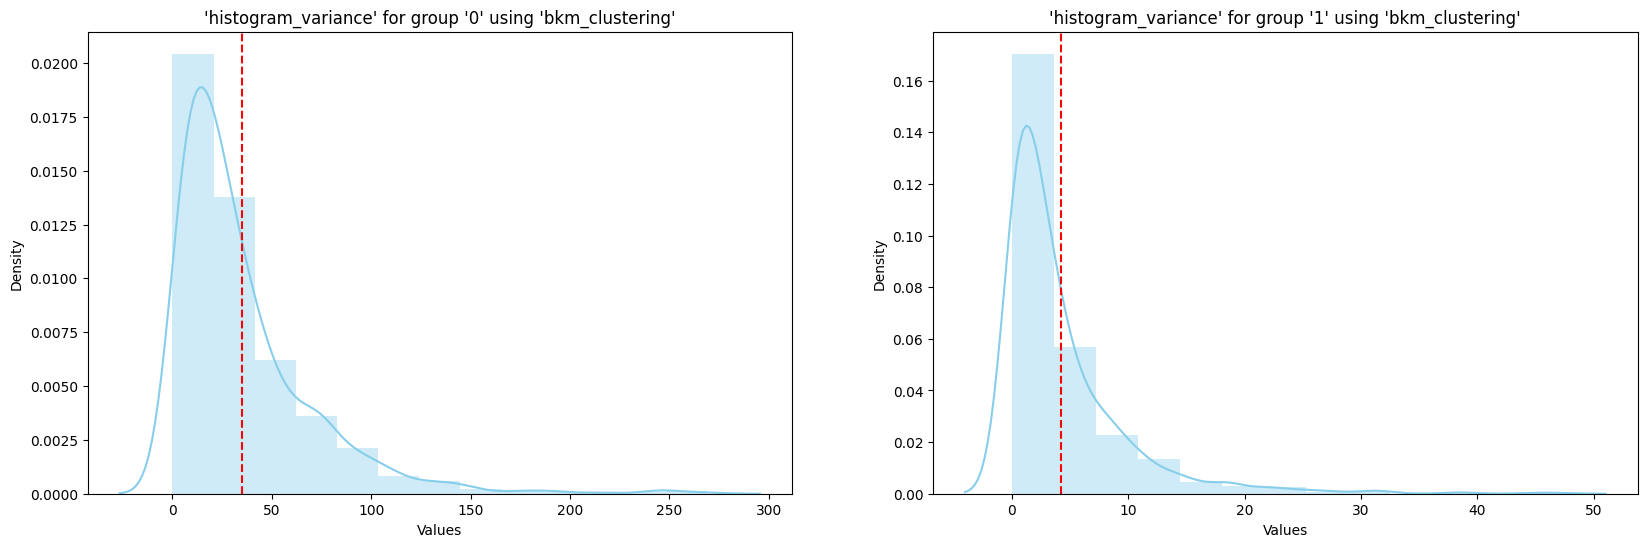

Clustering method:  gmm_clustering


<Figure size 640x480 with 0 Axes>

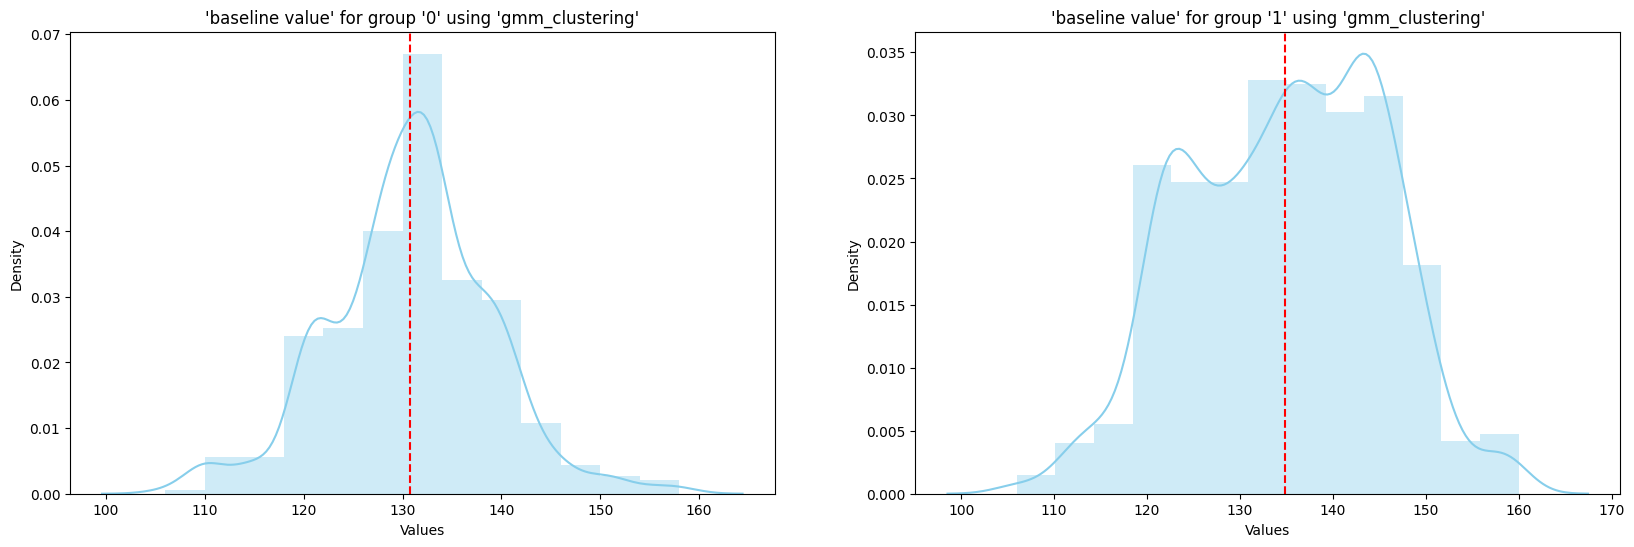

<Figure size 640x480 with 0 Axes>

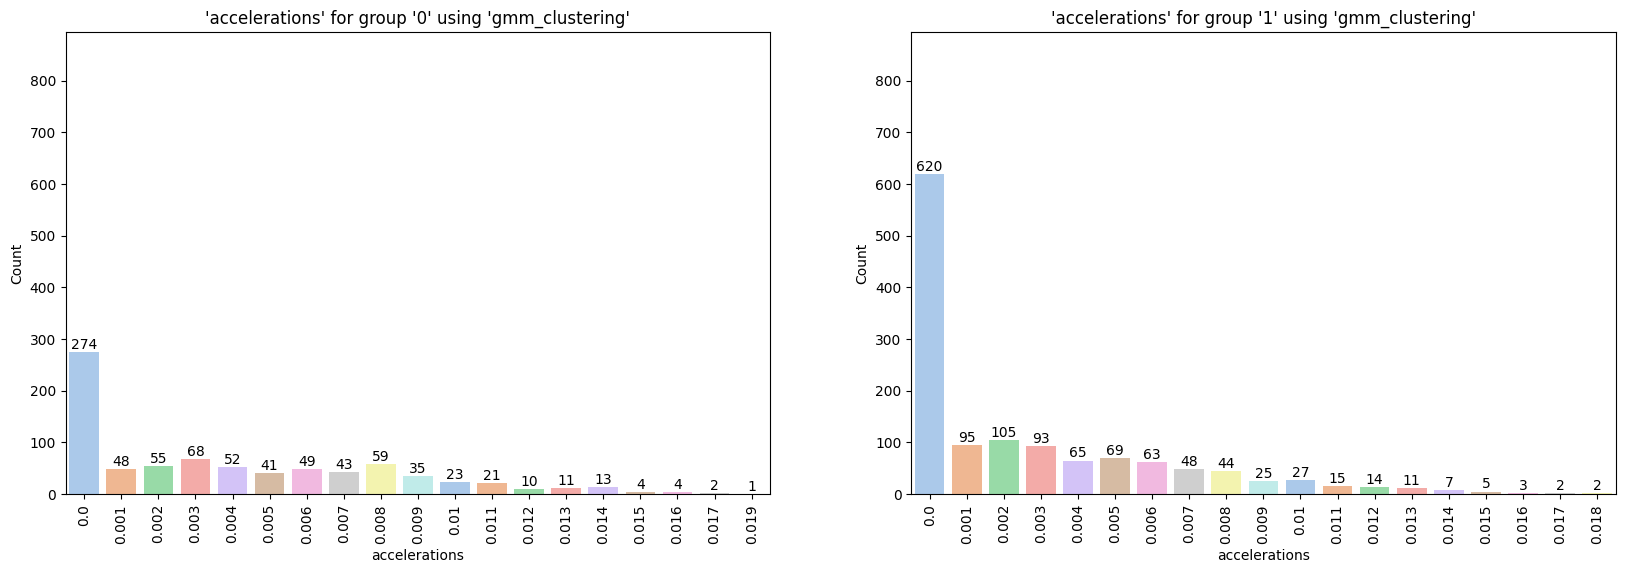

<Figure size 640x480 with 0 Axes>

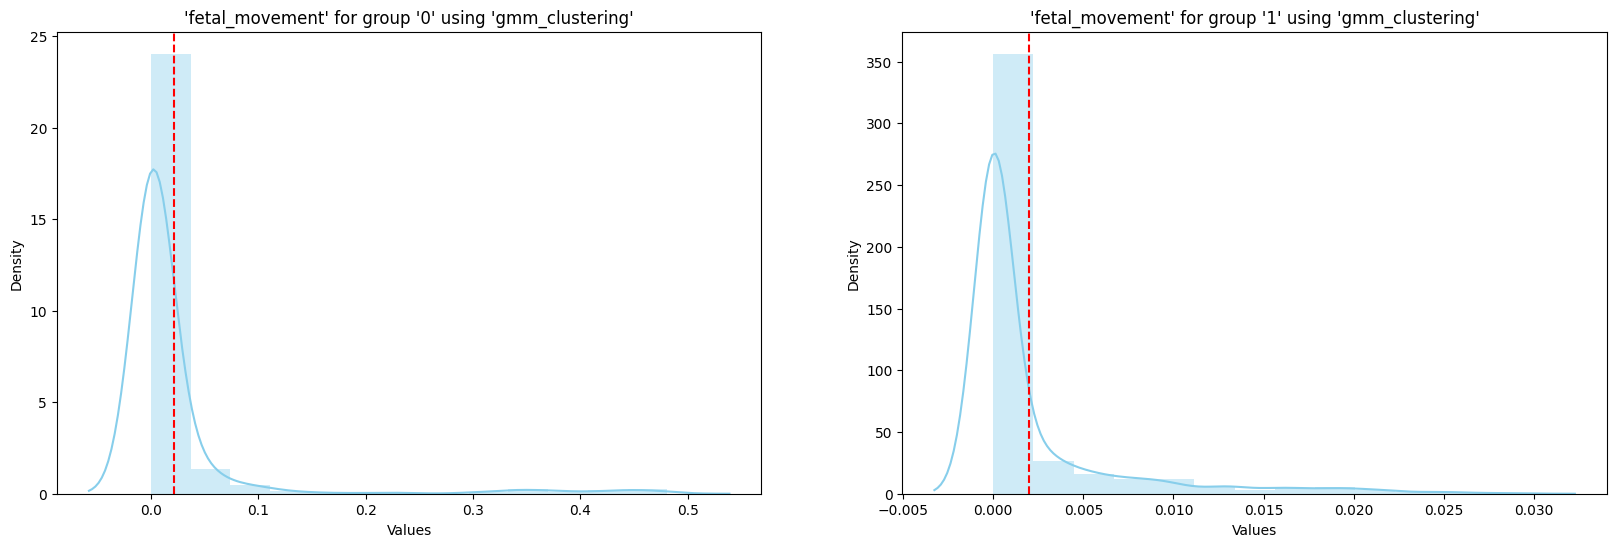

<Figure size 640x480 with 0 Axes>

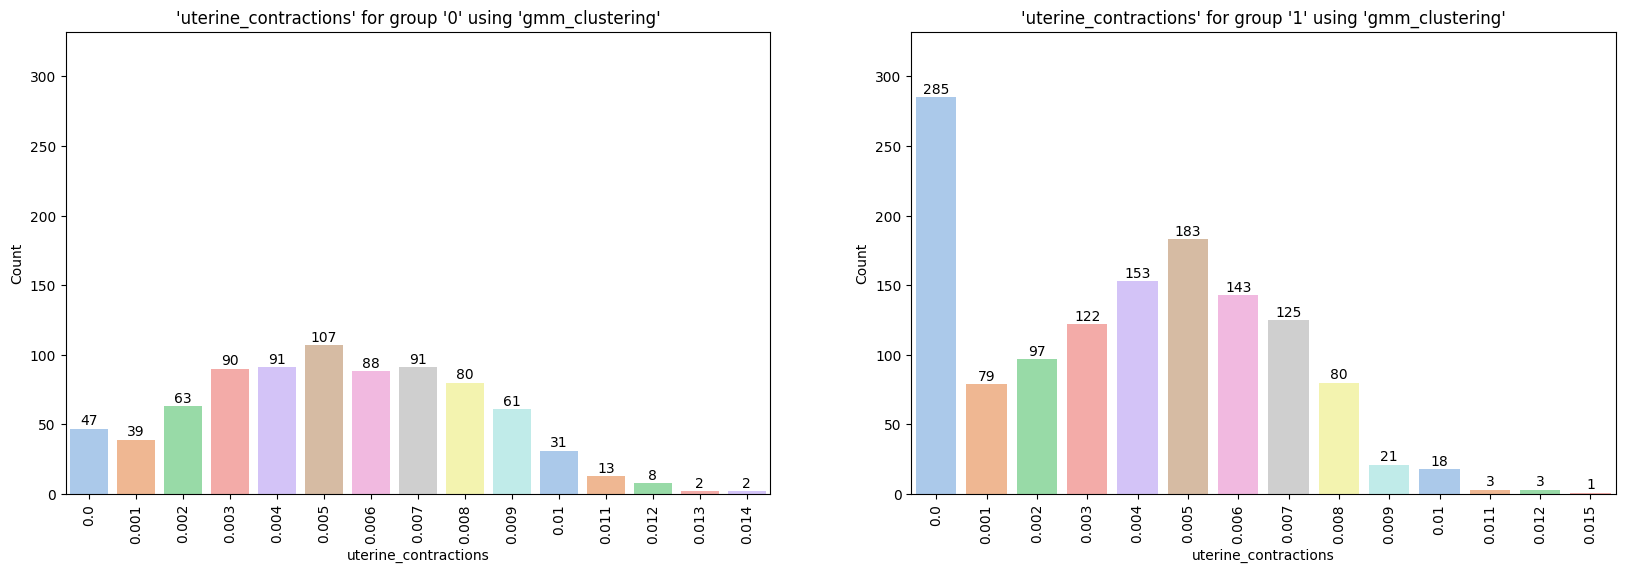

<Figure size 640x480 with 0 Axes>

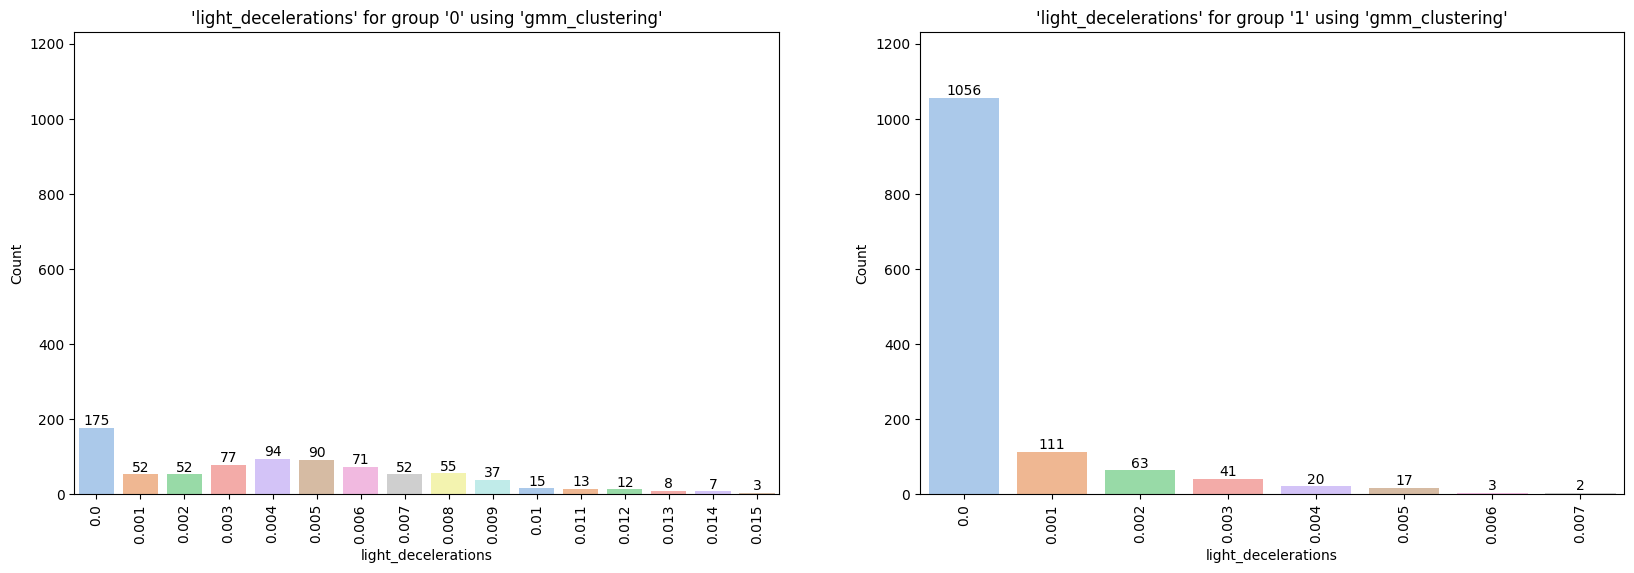

<Figure size 640x480 with 0 Axes>

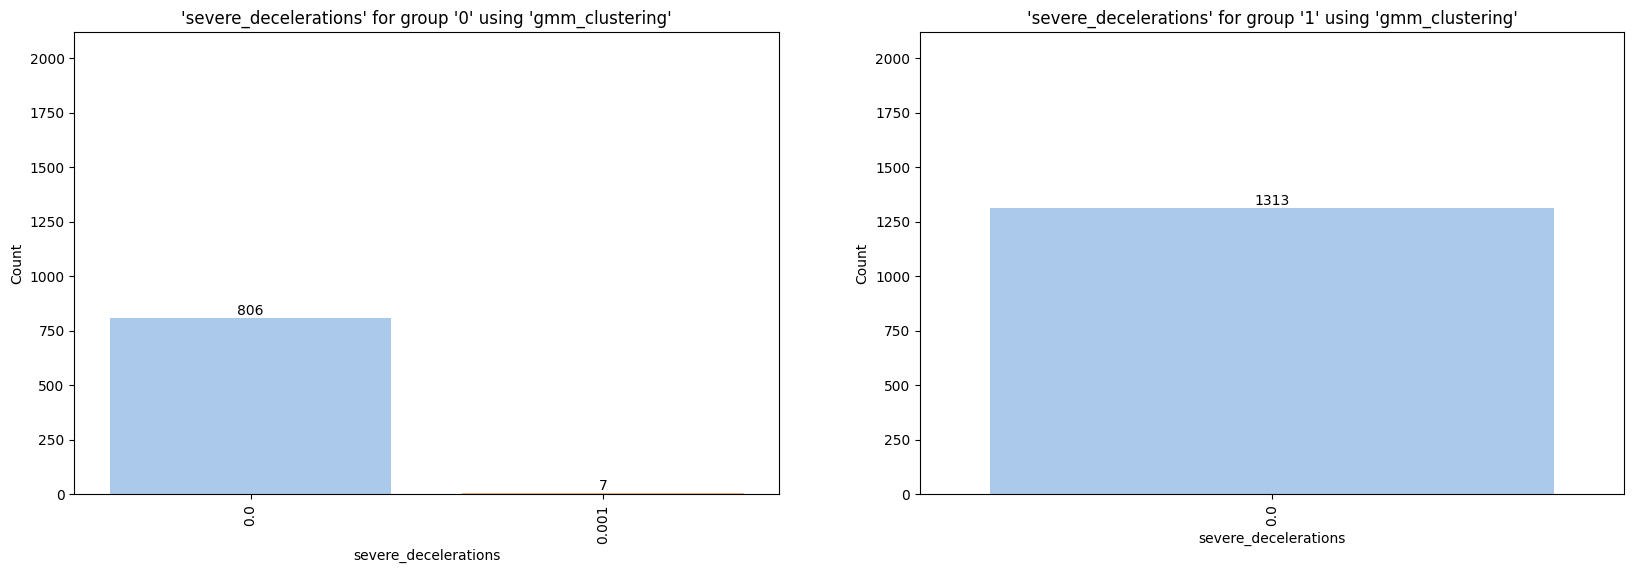

<Figure size 640x480 with 0 Axes>

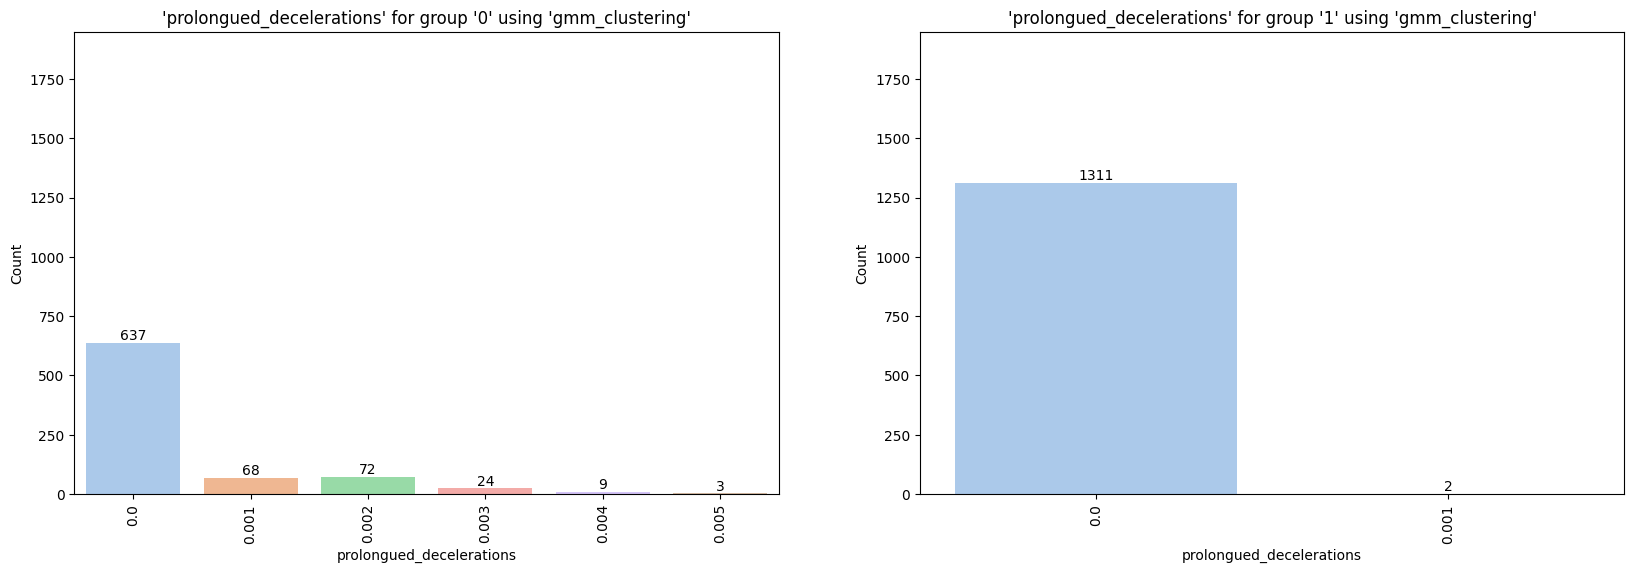

<Figure size 640x480 with 0 Axes>

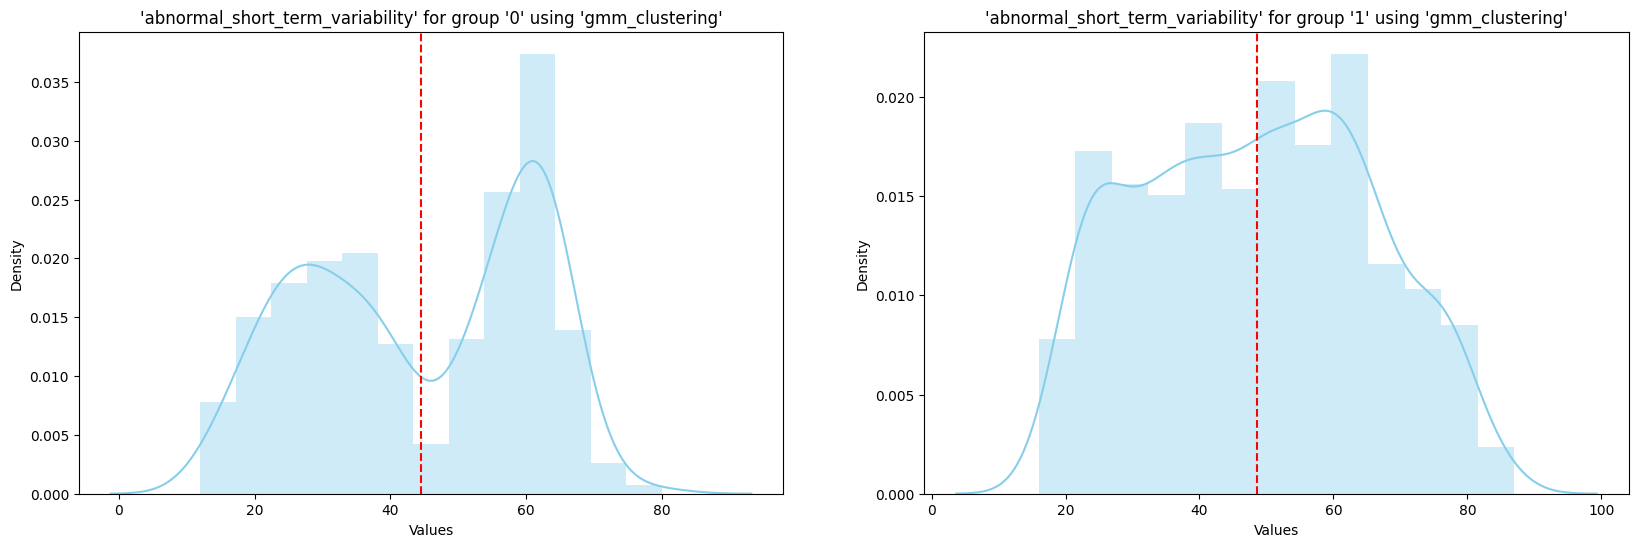

<Figure size 640x480 with 0 Axes>

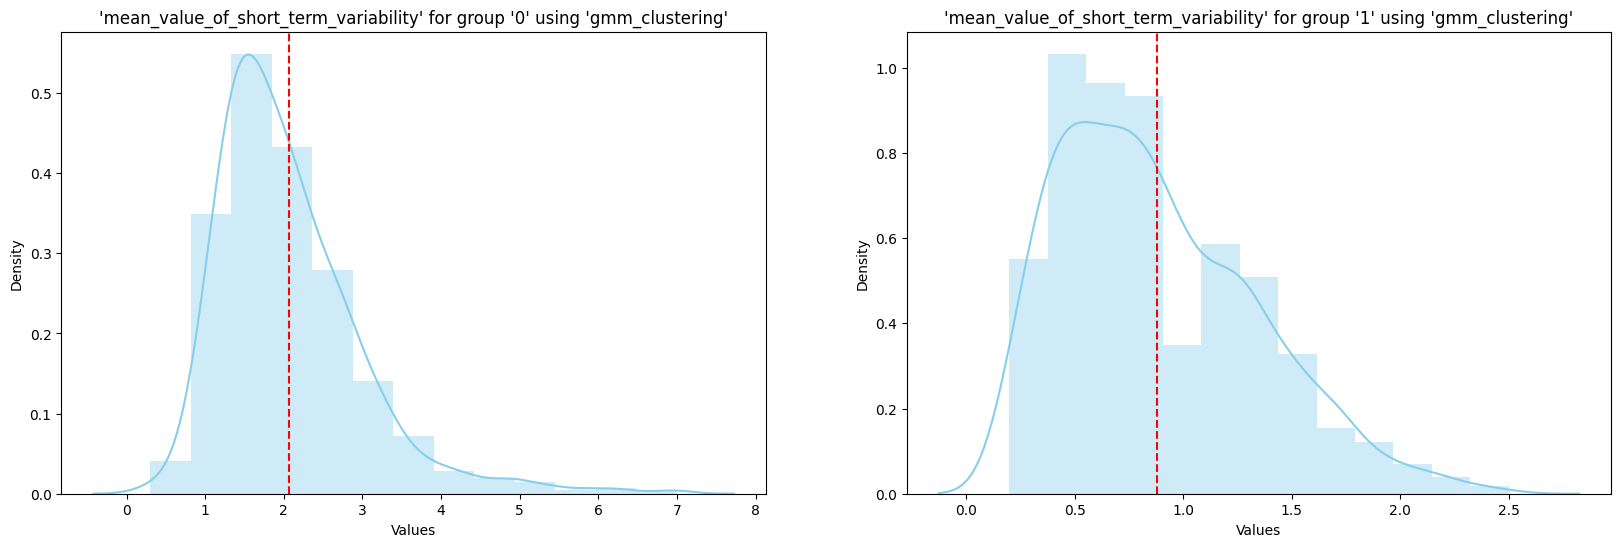

<Figure size 640x480 with 0 Axes>

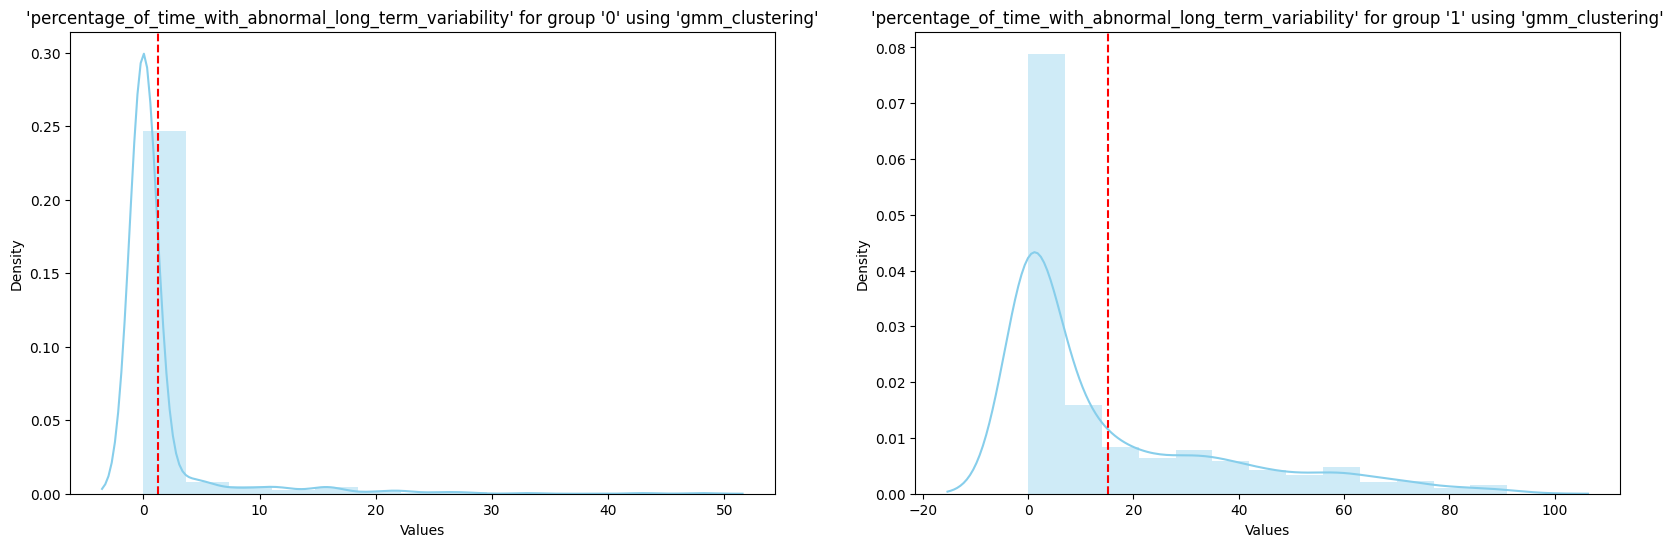

<Figure size 640x480 with 0 Axes>

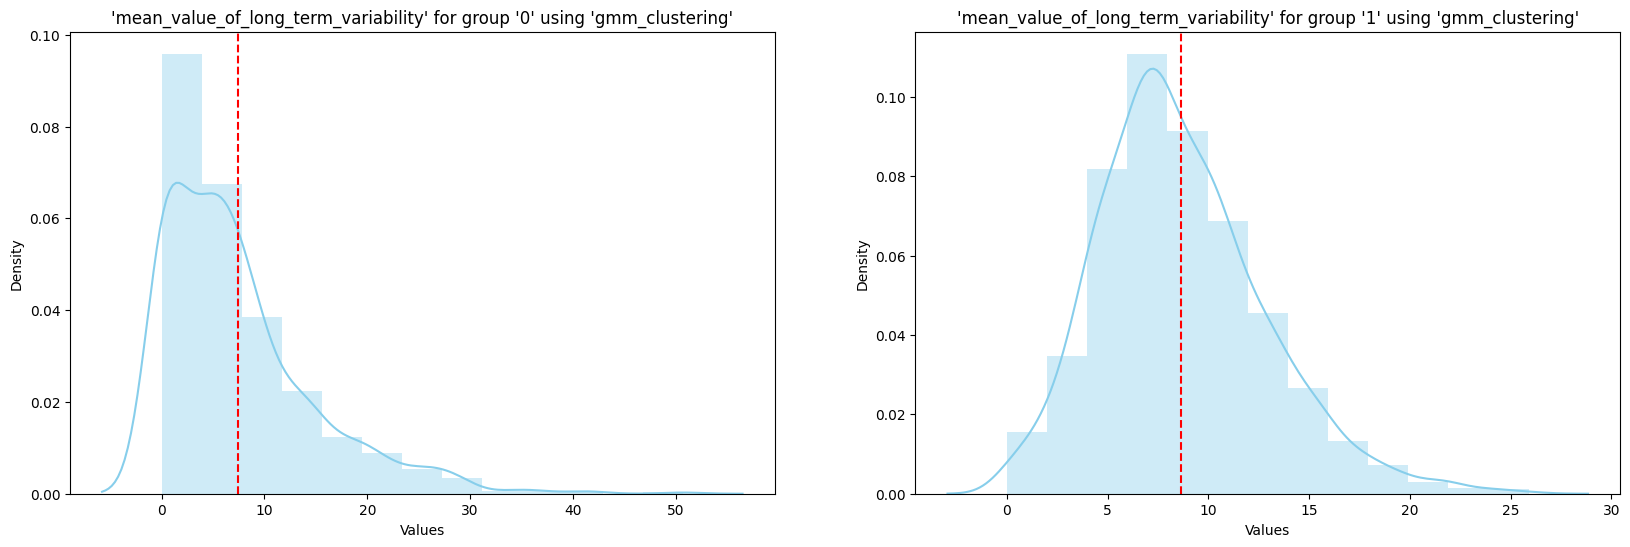

<Figure size 640x480 with 0 Axes>

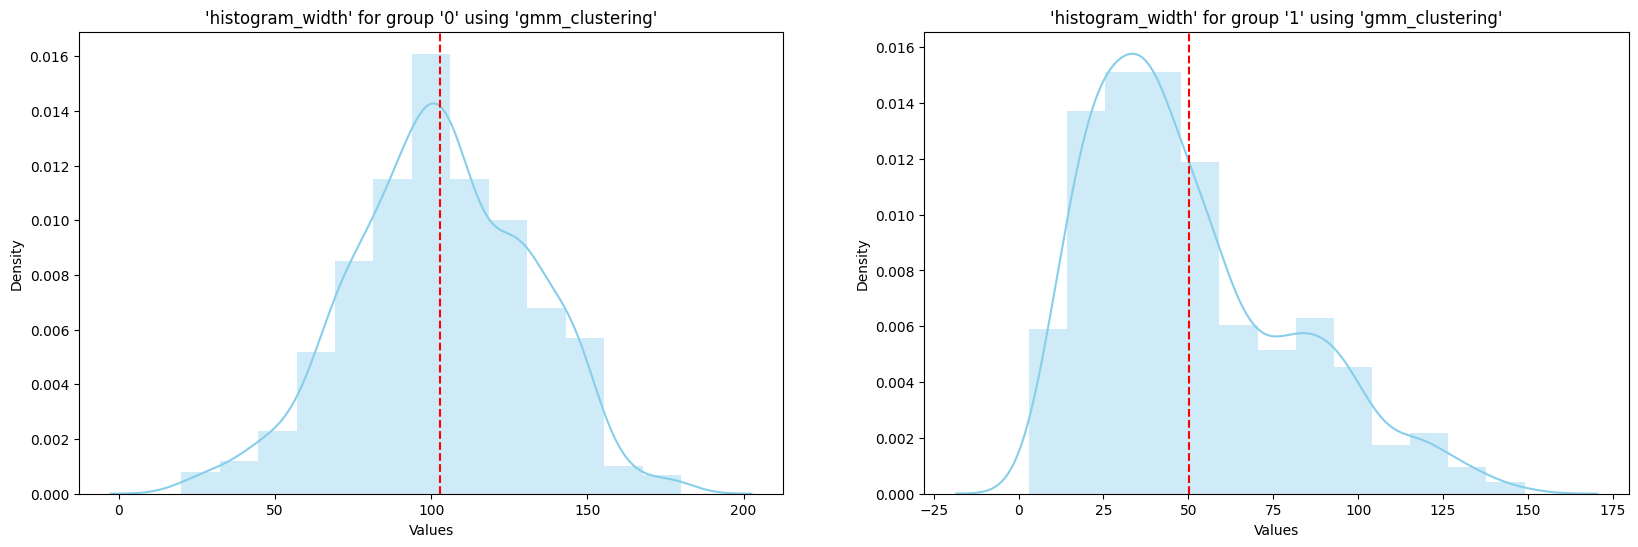

<Figure size 640x480 with 0 Axes>

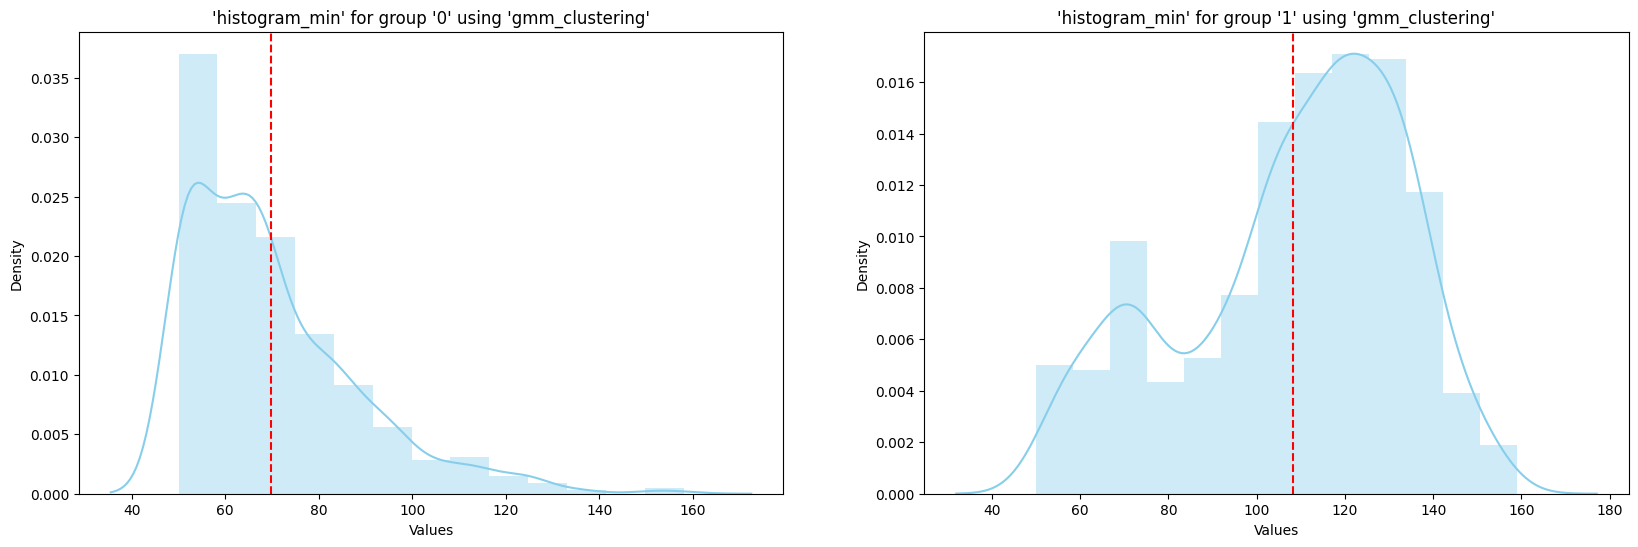

<Figure size 640x480 with 0 Axes>

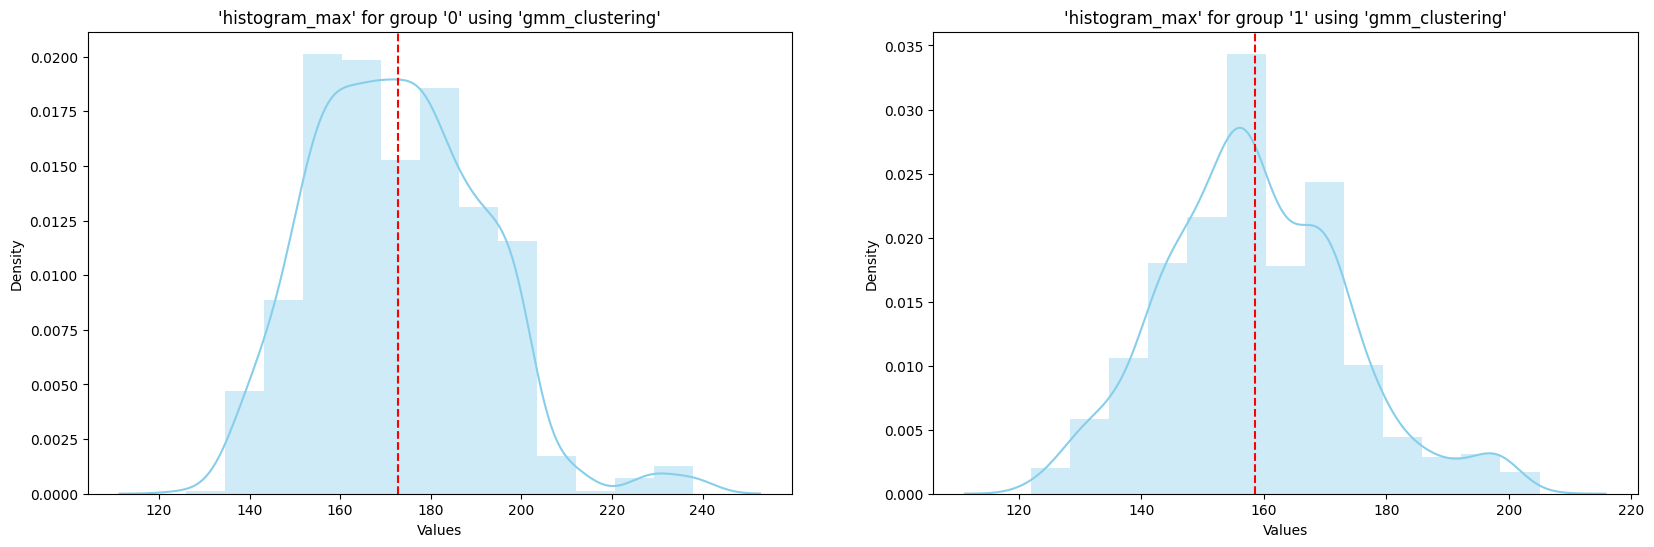

<Figure size 640x480 with 0 Axes>

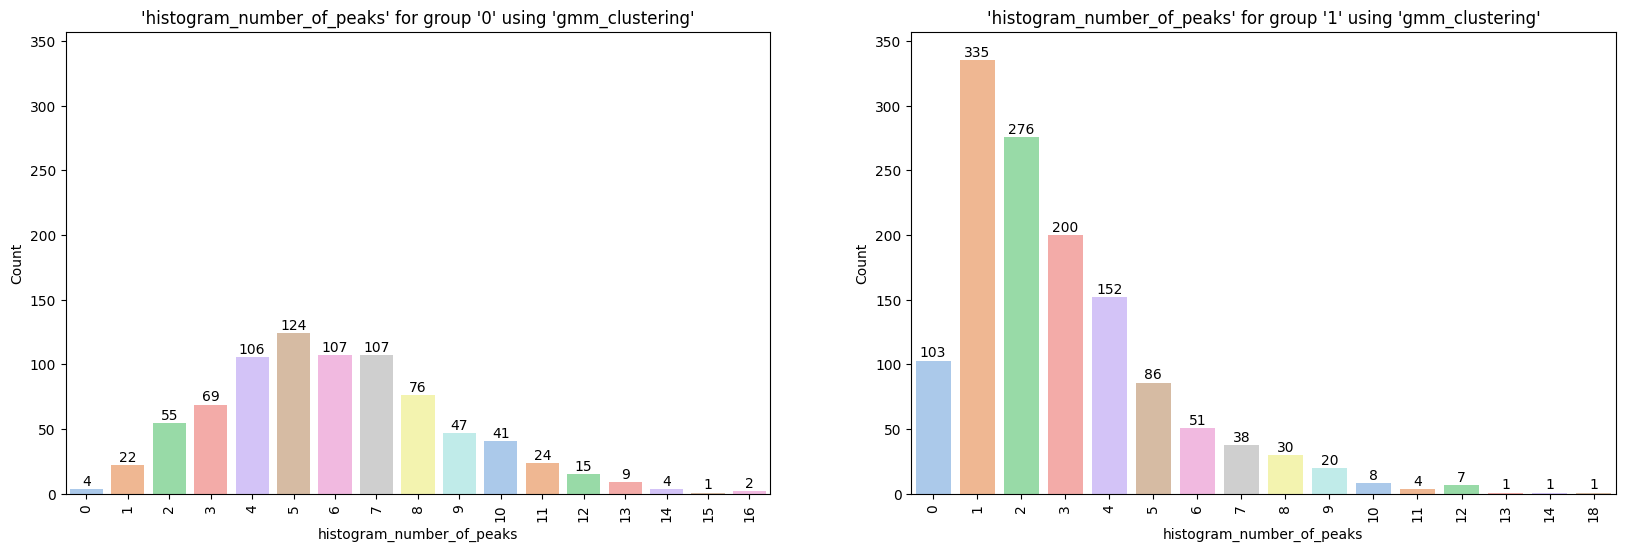

<Figure size 640x480 with 0 Axes>

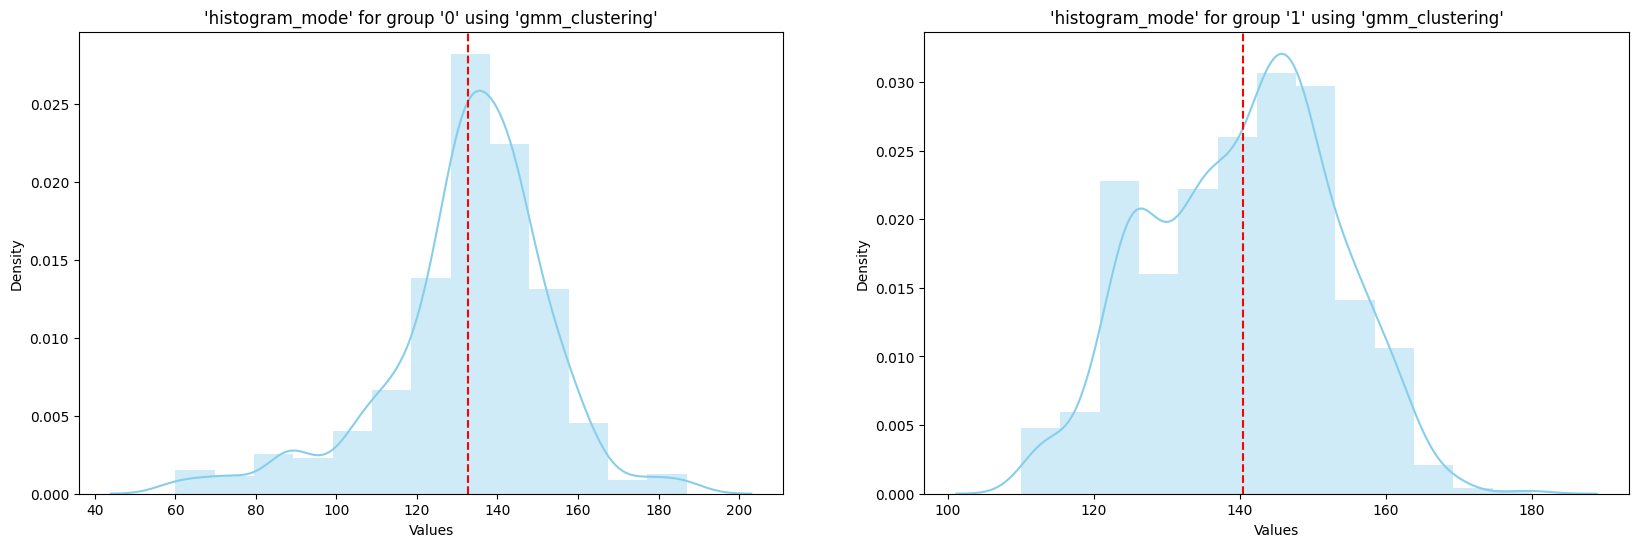

<Figure size 640x480 with 0 Axes>

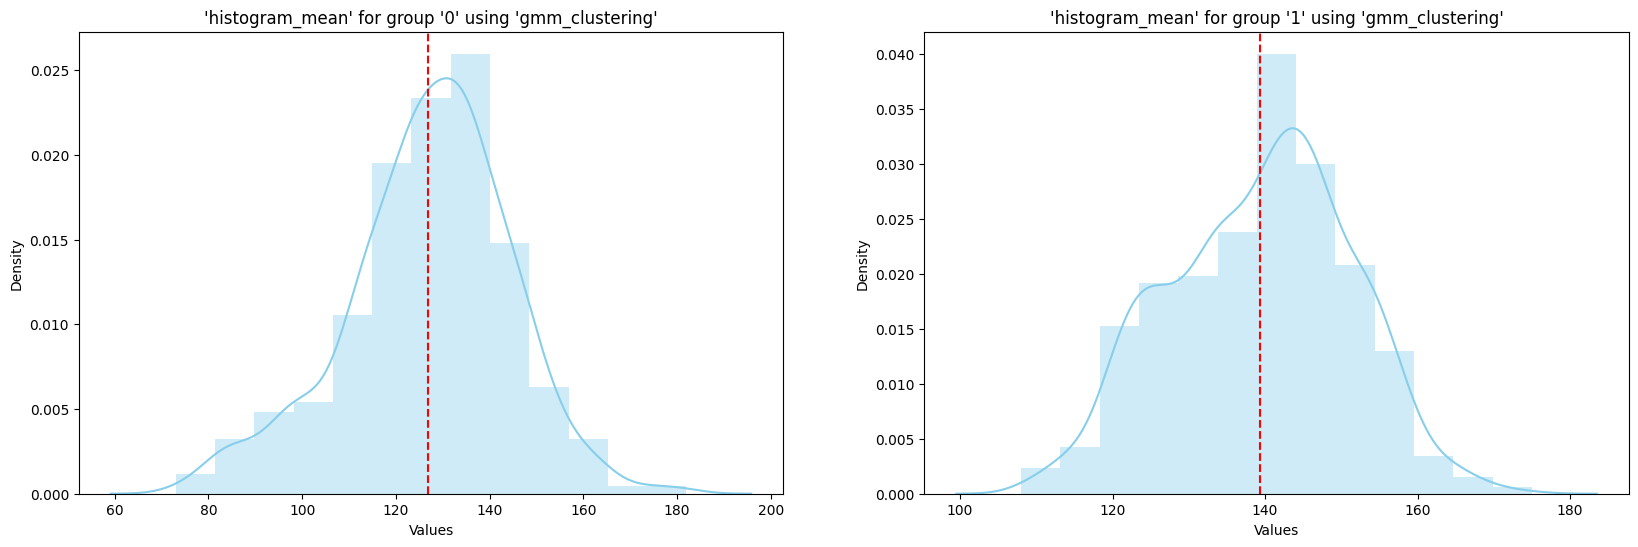

<Figure size 640x480 with 0 Axes>

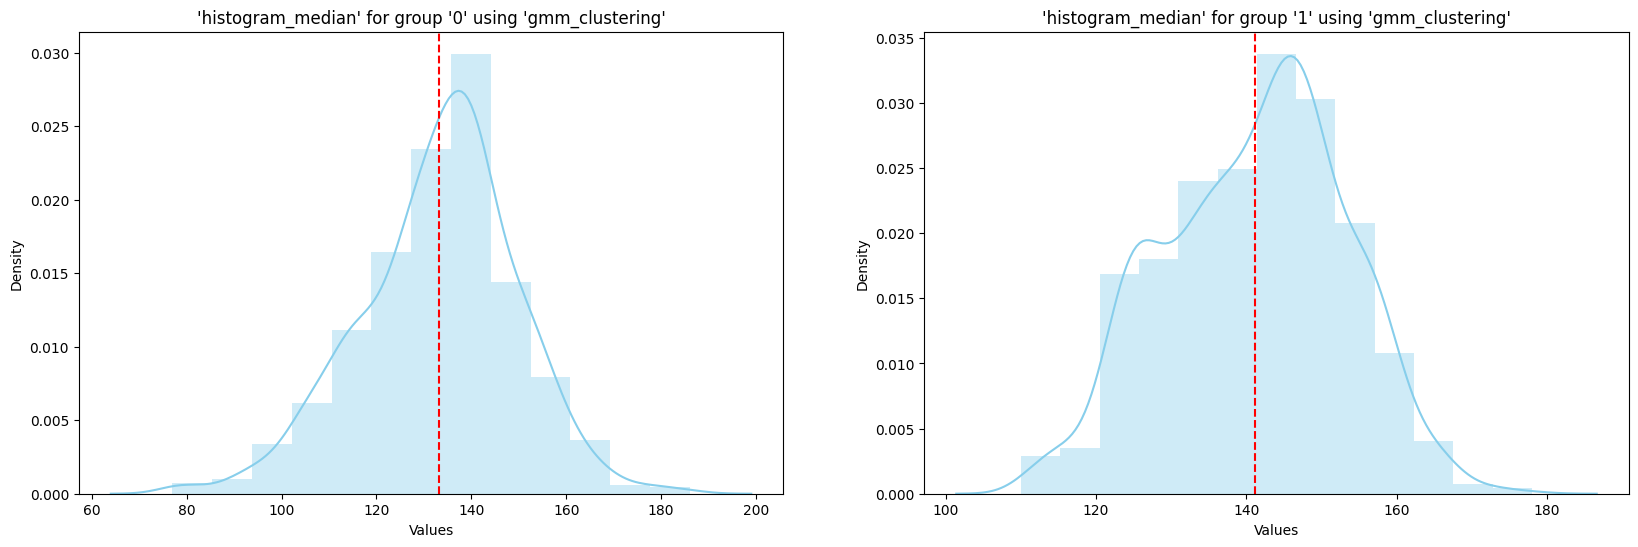

<Figure size 640x480 with 0 Axes>

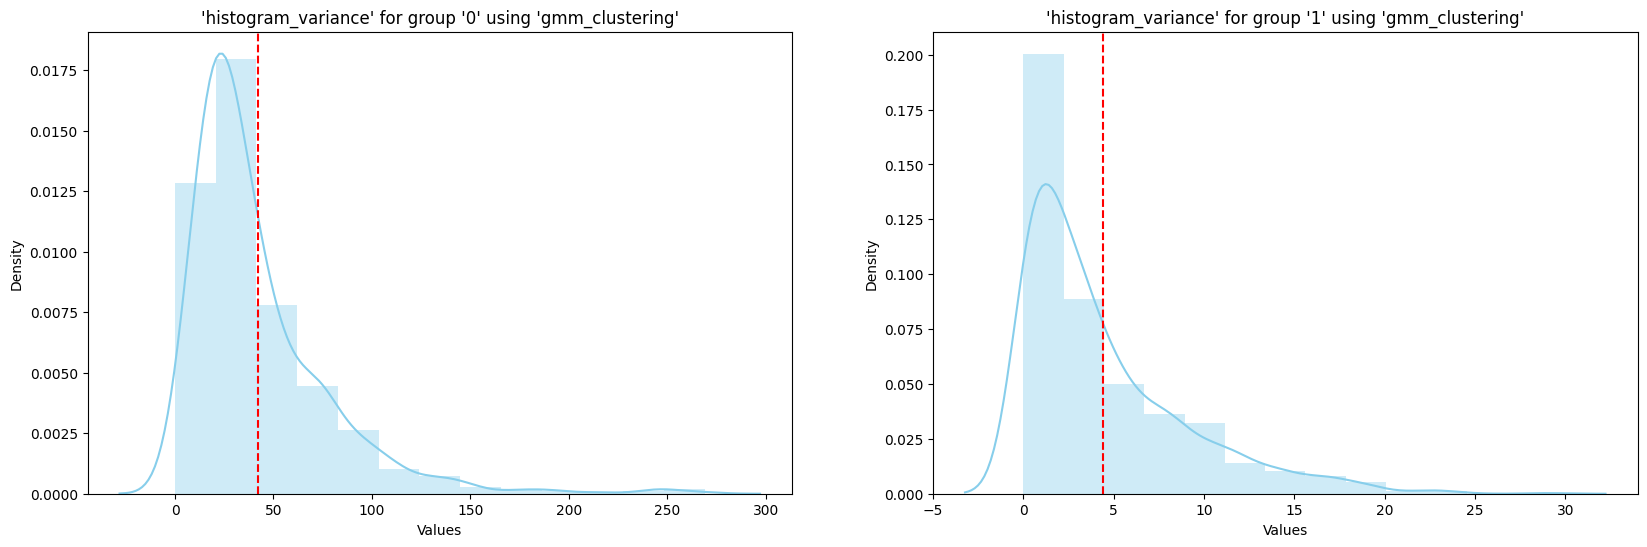

<Figure size 640x480 with 0 Axes>

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

for clustering in cluster_columns:
  print('Clustering method: ', clustering)
  for column in data.columns:
    fig, axes = plt.subplots(1, 2, figsize=(20, 6));
    if len(df[column].unique()) >30 :
      for group in groups:
        sns.distplot(df[df[clustering] == group][column], bins=int(np.ceil(np.log2(df.shape[0]) + 1)), color='skyblue', ax = axes[group])
        mean = df[df[clustering] == group][column].mean()
        axes[group].axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
        title = f"'{column}' for group '{group}' using '{clustering}'"
        axes[group].set_xlabel('Values')
        axes[group].set_ylabel('Density')
        axes[group].set_title(title)
      plt.show()
      plt.tight_layout()
    elif df[column].dtype == 'int32' or df[column].dtype == 'int64' or len(df[column].unique()) <=30 :
      for group in groups:
        categories, counts = np.unique(df[df[clustering] == group][column], return_counts=True);
        custom_palette = sns.color_palette("pastel", len(categories))
        sns.barplot(x=categories, y=counts, palette=custom_palette, ax = axes[group]);
        title = f"'{column}' for group '{group}' using '{clustering}'"
        axes[group].set_xlabel(column)
        axes[group].set_ylabel('Count')
        axes[group].set_title(title)
        axes[group].set_xticklabels(axes[group].get_xticklabels(), rotation=90)
        for i, v in enumerate(counts):
          axes[group].text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10)
        axes[group].set_ylim(0, (df[column]).value_counts().max())
      plt.show()
      plt.tight_layout()
    elif df[column].dtype == 'O':
      for group in groups:
        categories, counts = np.unique(df[df[clustering] == group][column], return_counts=True);
        custom_palette = sns.color_palette("pastel", len(categories))
        sns.barplot(x=categories, y=counts, palette=custom_palette, ax = axes[group]);
        title = f"'{column}' for group '{group}' using '{clustering}'"
        axes[group].set_xticklabels(axes[group].get_xticklabels(), rotation=90)
        axes[group].set_xlabel(column)
        axes[group].set_ylabel('Count')
        axes[group].set_title(title)
      plt.show()
      plt.tight_layout()

    # elif df[column].dtype == 'float64'or df[column].unique().sum() > 30 :
    #   for group in groups:
    #     sns.distplot(df[df[clustering] == group][column], bins=int(np.ceil(np.log2(df.shape[0]) + 1)), color='skyblue', ax = axes[group])
    #     title = f"'{column}' for group '{group}' using '{clustering}'"
    #     axes[group].set_xlabel('Values')
    #     axes[group].set_ylabel('Density')
    #     axes[group].set_title(title)
    #   plt.show()
    #   plt.tight_layout()




In [22]:
for clustering in cluster_columns:
  print('Resultado de método: ', clustering)
  print('grupo 0' ,list(df[df[clustering] == 0]['fetal_health']))
  print((df[df[clustering] == 0]['fetal_health']).value_counts(), '\n \n');
  print('grupo 1 ',list(df[df[clustering] == 1]['fetal_health']))
  print((df[df[clustering] == 1]['fetal_health']).value_counts(), '\n \n');

Resultado de método:  km_clustering
grupo 0 [1, 3, 3, 3, 3, 3, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 3, 3, 3